In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [10]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
# from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from jupyter_dash import JupyterDash
from scipy import signal
from scipy.fft import fftshift
import plotly.graph_objects as go
import matplotlib.dates as mdates
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
import scipy.fftpack                 
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, peak_widths


## 1. Raw Data plots for Histograms

In [12]:

def read_synced_files(folder_path):
    dfs = []
    file_list = os.listdir(folder_path)
    
    for filename in file_list:
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dfs.append(df)
    dfs_concat = pd.concat(dfs)
    return dfs_concat
    
    # Now, 'dfs' is a list of DataFrames, each representing a CSV file in the folder


In [13]:
# Plots two histograms in one row for displaying hyperactive data and non-hyperactive datatypes Acceleration values.
def hyper_nonhpyer_plots(df,df2,filename):
    title_font = 20
    axis_font = 20
    bins=40
    font = {'family' : 'Sans'}
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    # rows,cols
    fig, axs  = plt.subplots(2, 2,figsize=(15, 5))
    plt.subplots_adjust(hspace = 0.5) # top=0.8-> for top title spacing.
    # First Row
    axs[0,0].set_title('Hyperactive (Accelerometer) \n' +filename, fontsize=title_font)
    axs[0,0].hist(df[' Accel_X'],bins=bins,color="red",label  = "X")
    axs[0,0].hist(df[' Accel_Y'],bins=bins,color="blue",label  = "Y")
    axs[0,0].hist(df[' Accel_Z'],bins=bins,color="green",label  = "Z")
    axs[0,1].set_title('Non Hyperactive (Accelerometer) \n' +filename, fontsize=title_font)
    axs[0,1].hist(df2[' Accel_X'],bins=bins,color="red",label  = "X")
    axs[0,1].hist(df2[' Accel_Y'],bins=bins,color="blue",label  = "Y")
    axs[0,1].hist(df2[' Accel_Z'],bins=bins,color="green",label  = "Z") 
    # Second Row
    axs[1,0].set_title('Hyperactive (Gryoscope) \n' +filename, fontsize=title_font)
    axs[1,0].hist(df[' Gyro_X'],bins=bins,color="red",label  = "X")
    axs[1,0].hist(df[' Gyro_Y'],bins=bins,color="blue",label  = "Y")
    axs[1,0].hist(df[' Gyro_Z'],bins=bins,color="green",label  = "Z")
    axs[1,1].set_title('Non Hyperactive (Gryoscope) \n' +filename, fontsize=title_font)
    axs[1,1].hist(df2[' Gyro_X'],bins=bins,color="red",label  = "X")
    axs[1,1].hist(df2[' Gyro_Y'],bins=bins,color="blue",label  = "Y")
    axs[1,1].hist(df2[' Gyro_Z'],bins=bins,color="green",label  = "Z") 
    # Add some space between subplots
    plt.tight_layout()
    plt.show()
               

In [14]:
def plot_behaviourtypes(df,filename):
    bh_type_unique = df["HyperactiveBehaviourType"].unique()
    # print("bh_type_unique: ",len(bh_type_unique),bh_type_unique)
    values_to_remove = ['-100', float('nan')]
    # Use NumPy's logical indexing to remove values
    bh_type_unique_filtered_array = bh_type_unique[~np.isin(bh_type_unique, values_to_remove)]
    # print("bh_type_unique NEW: ",len(bh_type_unique_filtered_array),bh_type_unique_filtered_array)
    title_font = 10
    axis_font = 20
    bins=40
    font = {'family' : 'Sans'}
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    #rows ,cols
    fig, axs  = plt.subplots(1, len(bh_type_unique_filtered_array),figsize=(15, 2))
    plt.subplots_adjust(hspace = 0.5) # top=0.8-> for top title spacing.
    for idx,val in enumerate(bh_type_unique_filtered_array):
        # print("idx,val: ",idx,val,type(val))
        title = val
        if val== "Manipulating object (turning pen over & over in hand)":
            title = "Manipulating object"
        # make a subset of behaviour type: df[df["HyperactiveBehaviourType"]==val]
        axs[idx].set_title(str(title) + ': Acc \n' +filename, fontsize=title_font)
        axs[idx].hist(df[df["HyperactiveBehaviourType"]==val][' Accel_X'],bins=bins,color="red",label  = "X")
        axs[idx].hist(df[df["HyperactiveBehaviourType"]==val][' Accel_Y'],bins=bins,color="blue",label  = "Y")
        axs[idx].hist(df[df["HyperactiveBehaviourType"]==val][' Accel_Z'],bins=bins,color="green",label  = "Z")
        axs[idx].legend()

     # Add some space between subplots
    plt.tight_layout()
    plt.show()

In [15]:
# using MATPLOT LIB we are able to print all the graphs on the screen itself.
def read_synced_files_and_plot_hist(folder_path):
    dfs = []
    file_list = os.listdir(folder_path)
    for filename in file_list:
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            print("filename: ",filename)
            print("===========================================================================================================================================")
            df = pd.read_csv(file_path,low_memory=False)
            df_hyperactive = df[df['Hyperactive_Restless'] == 1]
            df_no_hyperactive =df[df['Hyperactive_Restless'] == 0]
            hyper_nonhpyer_plots(df_hyperactive,df_no_hyperactive,filename)
            plot_behaviourtypes(df,filename)
   

In [ ]:
hist_folder = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/RenamedData/"
read_synced_files_and_plot_hist(hist_folder)


## 2. Raw Data plots for Spectograms

In [16]:
def average_sampling_rate(df):
    sr_dict = df["NewClock"].value_counts().to_dict()
    # Step 1: Calculate the sum of all values
    total_sum = sum(sr_dict.values())
    # Step 2: Count the number of values
    num_values = len(sr_dict)
    if num_values !=0:
        print("num_values: ",num_values)
        print("total_sum: ",total_sum)
        # Step 3: Calculate the average
        average_sr = total_sum / num_values
        return average_sr
    else:
        return "na"

In [17]:
# Convert the elapsed_time strings to seconds
def to_seconds(time_string):
    minutes, seconds = map(int, time_string.split(":")[1:])
    return minutes * 60 + seconds


In [18]:
def plot_spectograms(df,df2,filename):
    average_sr1 = average_sampling_rate(df)
    average_sr2 = average_sampling_rate(df2)
    NFFT = 256  # the length of the windowing segments
    # Fs = average_sr #/dt  # the sampling frequency
    # Compute the sectogram
    f, t, Sxx = signal.spectrogram(df[' Accel_X'], average_sr1)
    f2, t2, Sxx2 = signal.spectrogram(df2[' Accel_X'], average_sr2)
    # print("Freq: ",f)
    # print("Time: ",t)
    title_font = 20
    axis_font = 20
    bins=40
    font = {'family' : 'Sans'}
    plt.rc('font', **font)
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    # rows,cols
    fig, axs  = plt.subplots(4,figsize=(40, 40))
    plt.subplots_adjust(hspace = 0.5) # top=0.8-> for top title spacing.
    
    # First Row
    axs[0].set_title(' (Accelerometer) \n' +filename, fontsize=title_font)
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Frequency (Hz)')
    axs[0].set_ylim(0, 1)
    desired_font_size = 30  # Adjust as needed

    specgram1 = axs[0].pcolormesh(t, f, Sxx, shading='gouraud')
    axs[1].plot(df["NewClock"],df['Hyperactive_Restless'],color="red", label="Accel_X")
    axs[1].set_xlim(0,600)
    axs[2].plot(df["NewClock"],df[' Accel_Y'],color="blue", label="Accel_Y")
    axs[3].plot(df["NewClock"],df[' Accel_Z'],color="green", label="Accel_Z")
    seconds = [to_seconds(time) for time in df["NewClock"]]
    interval = 300
    axs[1].set_xticks(seconds[::interval])
    axs[1].set_xticklabels(df["NewClock"][::interval], rotation=45)  # Adjust the 10 to change the tick frequency
    axs[1].set_xlabel('Elapsed Time')
    axs[1].tick_params(axis='x', labelsize=desired_font_size)
    axs[1].tick_params(axis='y', labelsize=desired_font_size)
    axs[1].legend(loc='upper right')  # Display the legend, you can adjust the location

    axs[2].set_xticks(seconds[::interval])
    axs[2].set_xticklabels(df["NewClock"][::interval], rotation=45)  # Adjust the 10 to change the tick frequency
    axs[2].set_xlabel('Elapsed Time')
    axs[2].tick_params(axis='x', labelsize=desired_font_size)
    axs[2].tick_params(axis='y', labelsize=desired_font_size)
    axs[2].legend(loc='upper right')  # Display the legend, you can adjust the location

    axs[3].set_xticks(seconds[::interval])
    axs[3].set_xticklabels(df["NewClock"][::interval], rotation=45)  # Adjust the 10 to change the tick frequency
    axs[3].set_xlabel('Elapsed Time')
    axs[3].tick_params(axis='x', labelsize=desired_font_size)
    axs[3].tick_params(axis='y', labelsize=desired_font_size)
    axs[3].legend(loc='upper right')  # Display the legend, you can adjust the location

    # print("Elapsed_Time")
    # print(df["Elapsed_Time"][0],type(df["Elapsed_Time"][0]))
    # print(df["Elapsed_Time"])
    plt.tight_layout()
    plt.show()

In [19]:
# SPECTOGRAM PLOTS UP NEXT.....
# using MATPLOT LIB we are able to print all the graphs on the screen itself.
def spectogram_run_and_plot(folder_path):
    dfs = []
    file_list = os.listdir(folder_path)
    for filename in file_list:
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            print("filename: ",filename)
            print("===========================================================================================================================================")
            df = pd.read_csv(file_path,low_memory=False)
            
            # print(df.columns)
            df = df[df["Hyperactive_Restless"] != -100]
            df_hyperactive = df[df['Hyperactive_Restless'] == 1]
            df_no_hyperactive =df[df['Hyperactive_Restless'] == 0]
            plot_spectograms(df,df_no_hyperactive,filename)
           
   

In [ ]:
# Call the spectogram function to create raw and spec plots for all the variables.
spec_folder = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/P8/"
spectogram_run_and_plot(spec_folder)


In [ ]:
# Call the spectogram function to create raw and spec plots for all the variables.
spec_folder = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/P24/"
spectogram_run_and_plot(spec_folder)


### 3. FFT plots for /BlobsofData


In [20]:
# Takes: An n-dimentional numpy array.
# Returns: yf,xf,AMP where yf is the scipi.fft() output, xf is the frequencies of the given fft, and AMP is the amplitude of the given fft. 
def my_fft(df,Fs):
    N = len(df)
    yf = scipy.fftpack.fft(df,n=N)
    # n, period of the signal.
    #print("my_fft() N//2: ",N//2)
    xf = scipy.fftpack.fftfreq(N,1/Fs)[:N//2] # get the frequency component Fs = 40 Hz
    #print("my_fft() xf:",xf)
    #print("xf: ",xf)
    AMP= 2.0/N * np.abs(yf[0:N//2])
    #print("AMP: ",AMP)
    return yf,xf,AMP


In [22]:
# using MATPLOT LIB we are able to print all the graphs on the screen itself.
def read_all_blobs(folder_path):
    dfs = []
    file_list = os.listdir(folder_path)
    for filename in file_list:
        if filename.endswith('.csv'):
            substring1 = "Talking_to_peers"
            substring2 = "Talking_to_self"
            if substring1 in filename or substring2 in filename:
                print("Skipping Talking_to_peers")
                print("Skipping Talking_to_self")
                pass
            else:
                file_path = os.path.join(folder_path, filename)
                print("===========================================================================================================")
                print("filename: ",filename)
                df = pd.read_csv(file_path)
                # filename:  P7_Left_A3_Talking_to_peers_8.csv
                # P7_Left_A2_Talking_to_self_6.csv
                dict_value_counts = df["NewClock"].value_counts().to_dict()
                # Calculate the sum of all values
                total = sum(dict_value_counts.values())
                Fs = average_sampling_rate(df)
                if Fs>30: # RED FLAG as Fs is greater than 30 Hz.
                    print(" FLAG !!!!!!!!!! ")
                yf,xf,AMP =  my_fft(df[' Accel_X'].to_numpy(),Fs)
                dominant_freq = xf[AMP.argmax()]
                max_amplitude = np.array(AMP).argmax()
                print("Dominant Frequency:AMP.argmax()", dominant_freq)
                print("Maximum amplitude index: - ",max_amplitude)
                # Exclude the dominant frequency and its amplitude if both are zero
                if dominant_freq == 0 and max_amplitude == 0:
                    exclude_index = AMP.argmax()
                    xf_new = np.delete(xf, exclude_index)
                    AMP_new = np.delete(AMP, exclude_index)
                else:
                    xf_new = xf
                    AMP_new = AMP
                dominant_freq_new = xf_new[AMP_new.argmax()]
                max_amplitude_new = np.array(AMP_new).argmax()
                ##################################
                #              PLOTTING          #
                ##################################
                # Setting fonts and styles
                title_font = 12
                axis_font = 40
                font = {'family' : 'Sans'}
                plt.rc('font', **font)
                plt.rc('xtick', labelsize=50) 
                plt.rc('ytick', labelsize=50) 

                # Create a 1x2 grid of subplots (1 row, 2 columns)
                fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Adjust figsize as needed

                # Adjust subplot spacing
                plt.subplots_adjust(wspace=0.5)  # Adjust the space between the plots

                # Plotting on the first subplot
                axs[0].plot(df[' Accel_X'], color="#171ad1", linestyle='--', label="RawData")
                axs[0].set_title('Raw Data Plot', fontsize=title_font)  # Set title for the first plot

                # Plotting on the second subplot
                axs[1].plot(xf_new, AMP_new, color="#171ad1", linewidth=4, label="FFT")
                axs[1].set_title('FFT Plot: ' + "Dominant Freq: " + str(dominant_freq_new) + "Max Amp: " + str(max_amplitude_new), fontsize=title_font)  # Set title for the first plot

                # Optional additional plots (commented out)
                # axs[0].plot(mov_average_filt, color="#171ad1", linewidth=4, label="MovingAverage")
                # axs[1].scatter(indicies_p2_freq, peaks_timebased_freq, marker="o", s=100, color="#ff1a00", label="Frequency Peaks")

                plt.show()



In [23]:
folder_path_blobs = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/BlobsOFSegments/"


filename:  P11_Left_A3_Moving_the_chair_back_and_forth_6.csv
num_values:  2
total_sum:  51
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


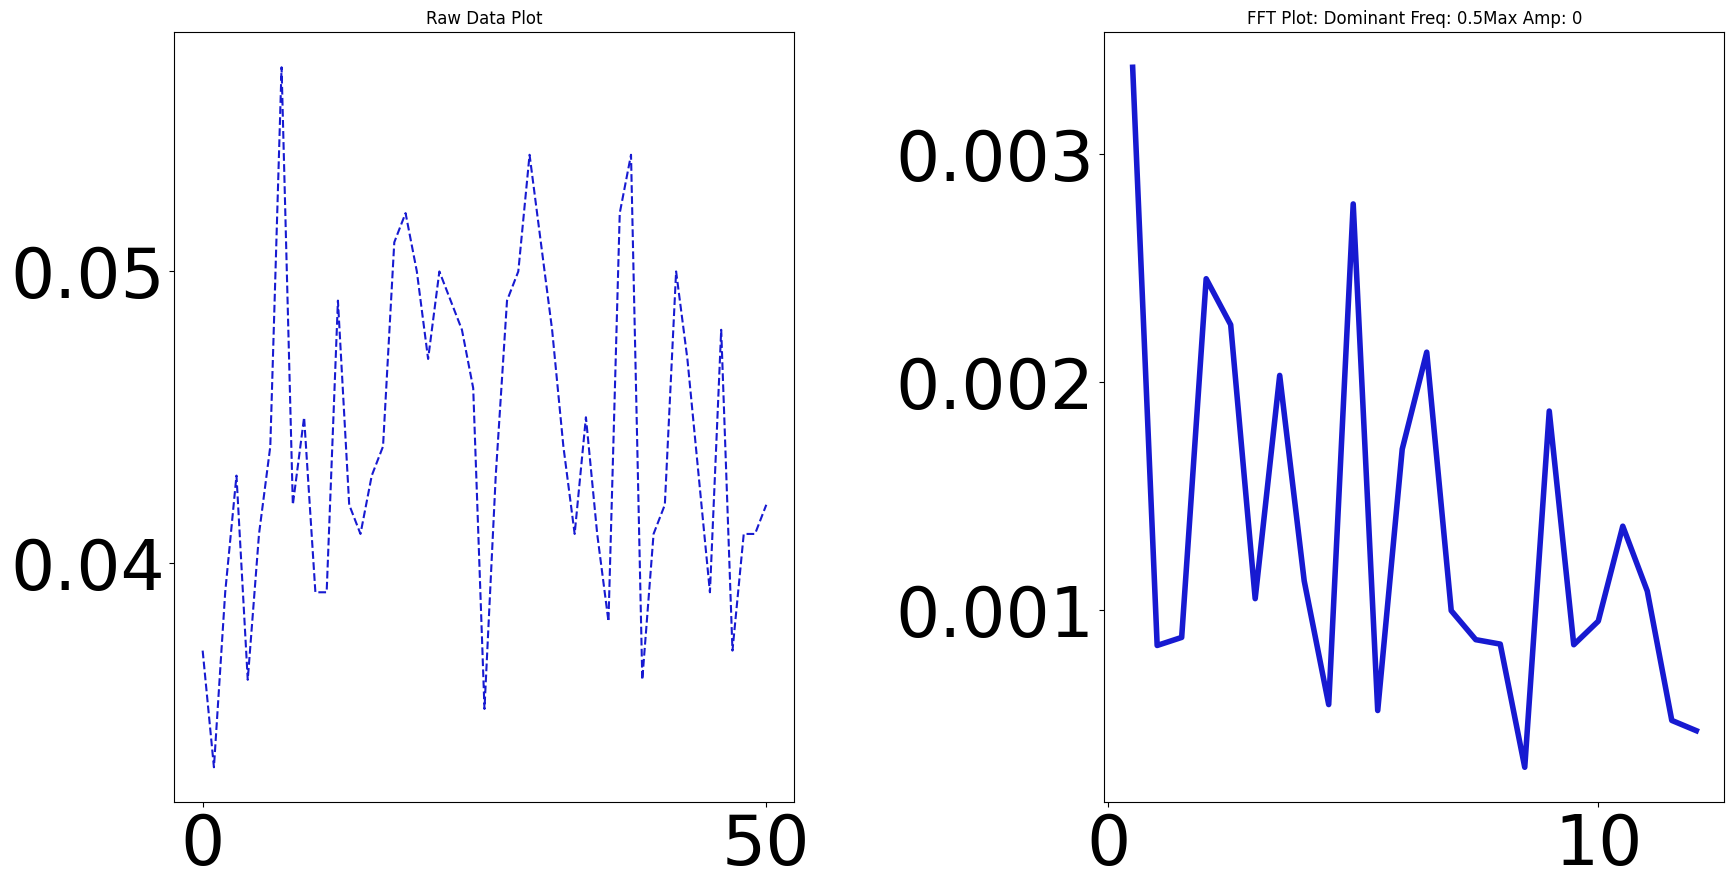

Skipping Talking_to_peers
Skipping Talking_to_self
Skipping Talking_to_peers
Skipping Talking_to_self
Skipping Talking_to_peers
Skipping Talking_to_self
filename:  P19_Left_A3_NoHyp_4.csv
num_values:  28
total_sum:  746
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


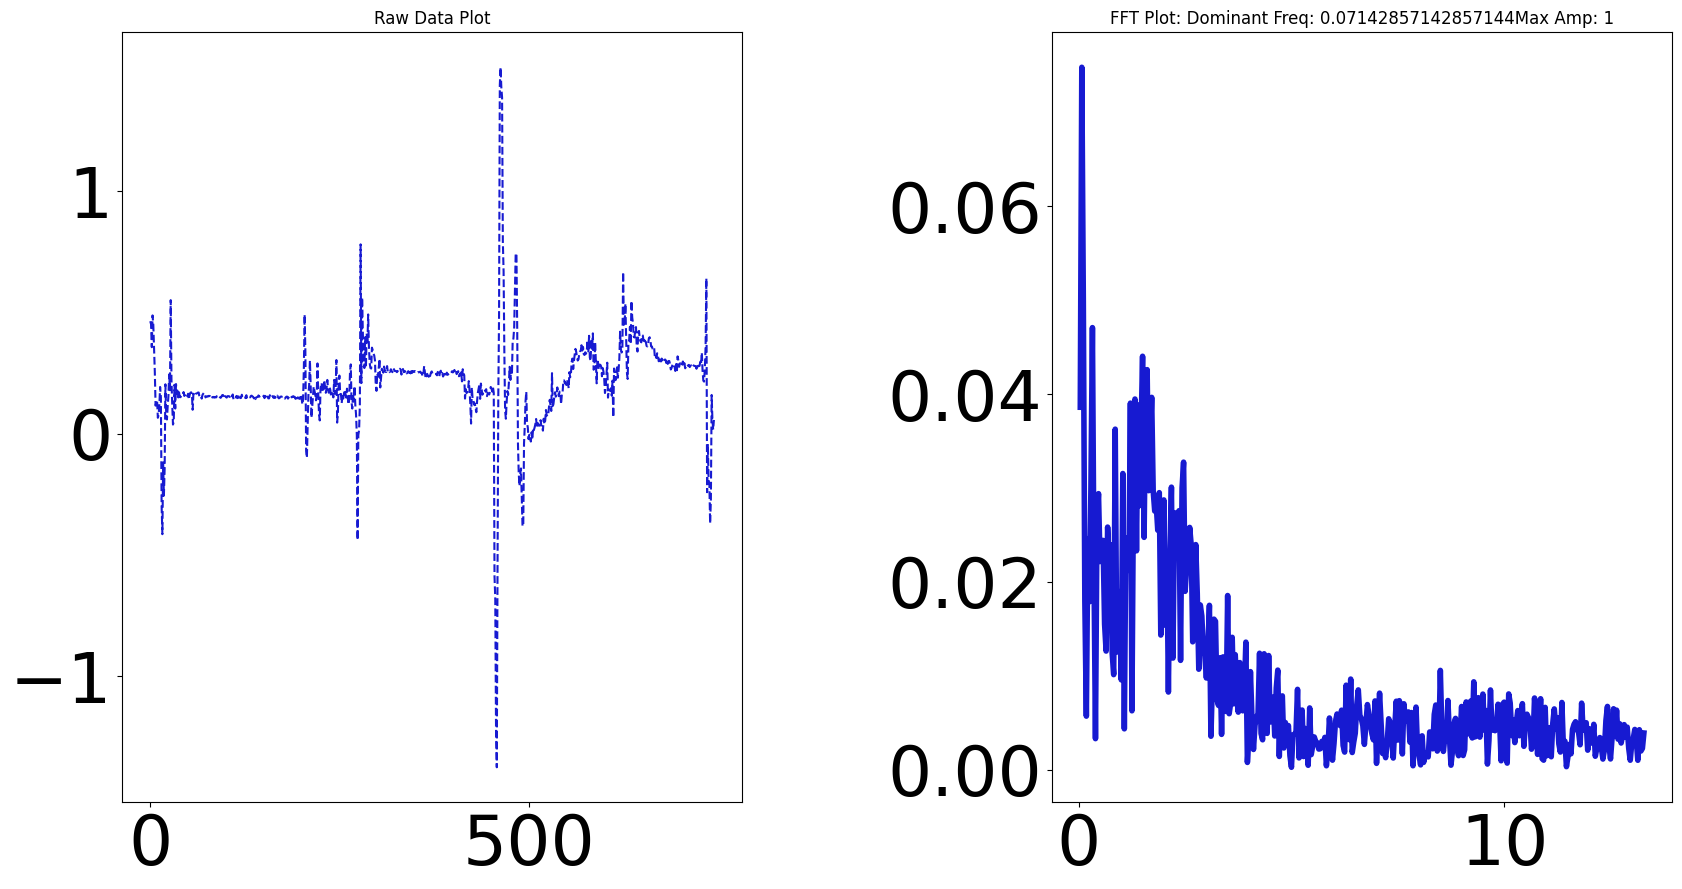

filename:  P21_Left_A1_NoHyp_17.csv
num_values:  41
total_sum:  1097
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


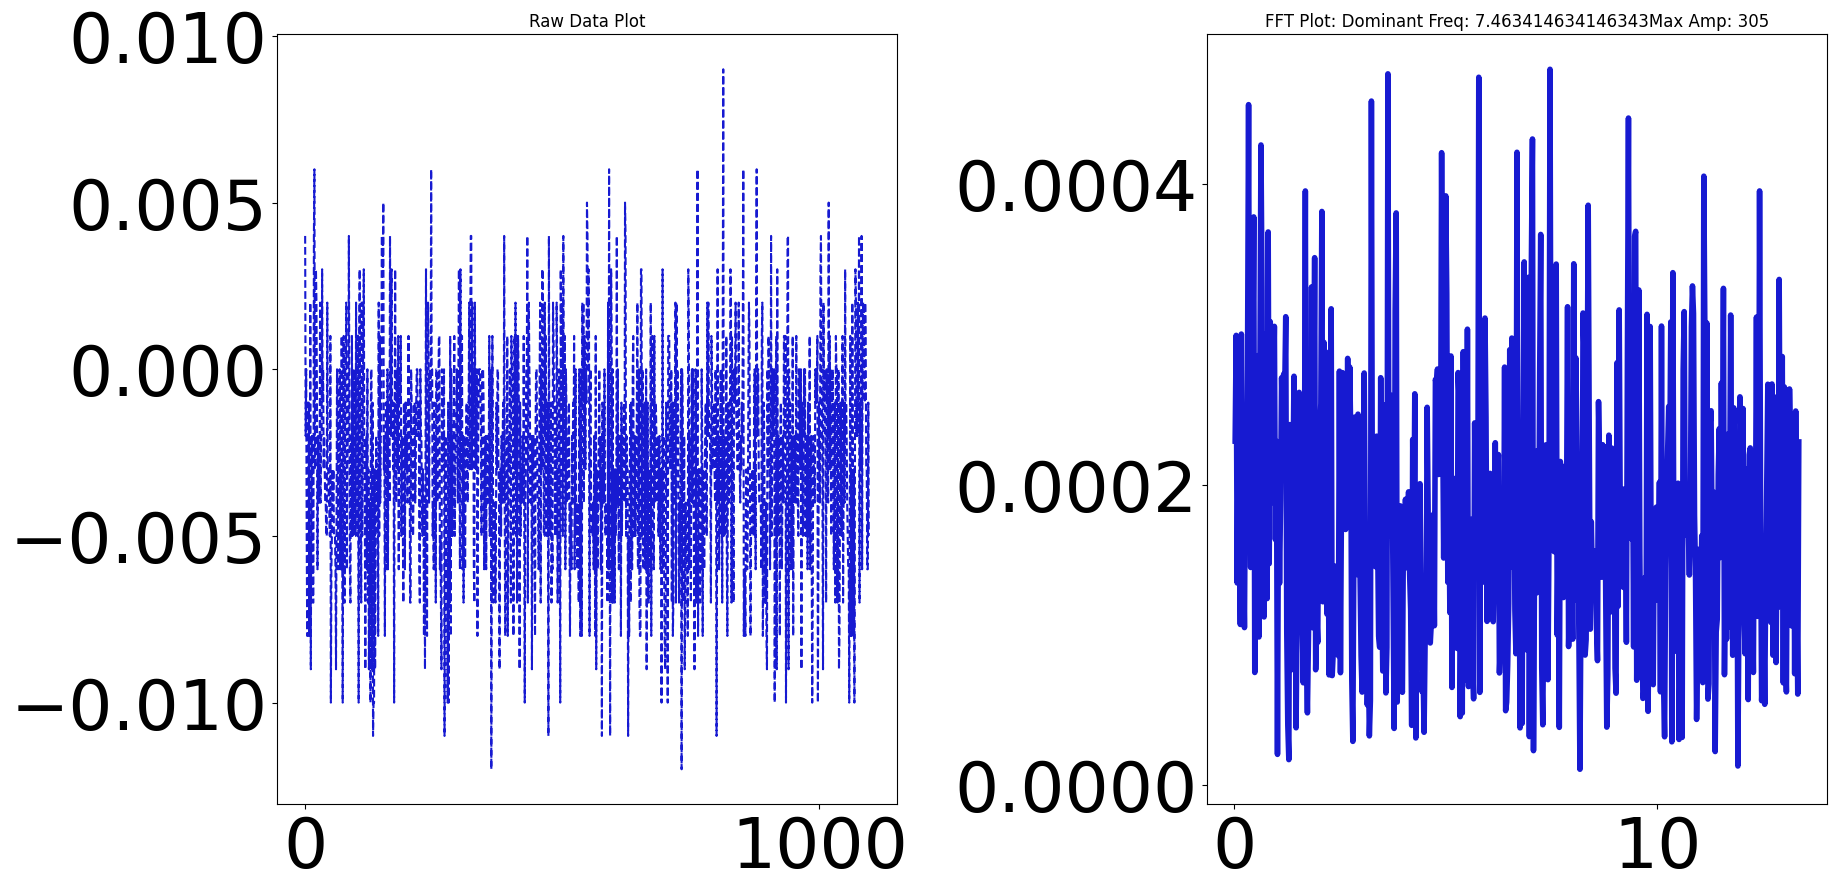

filename:  P7_Right_A3_NoHyp_89.csv
num_values:  5
total_sum:  132
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


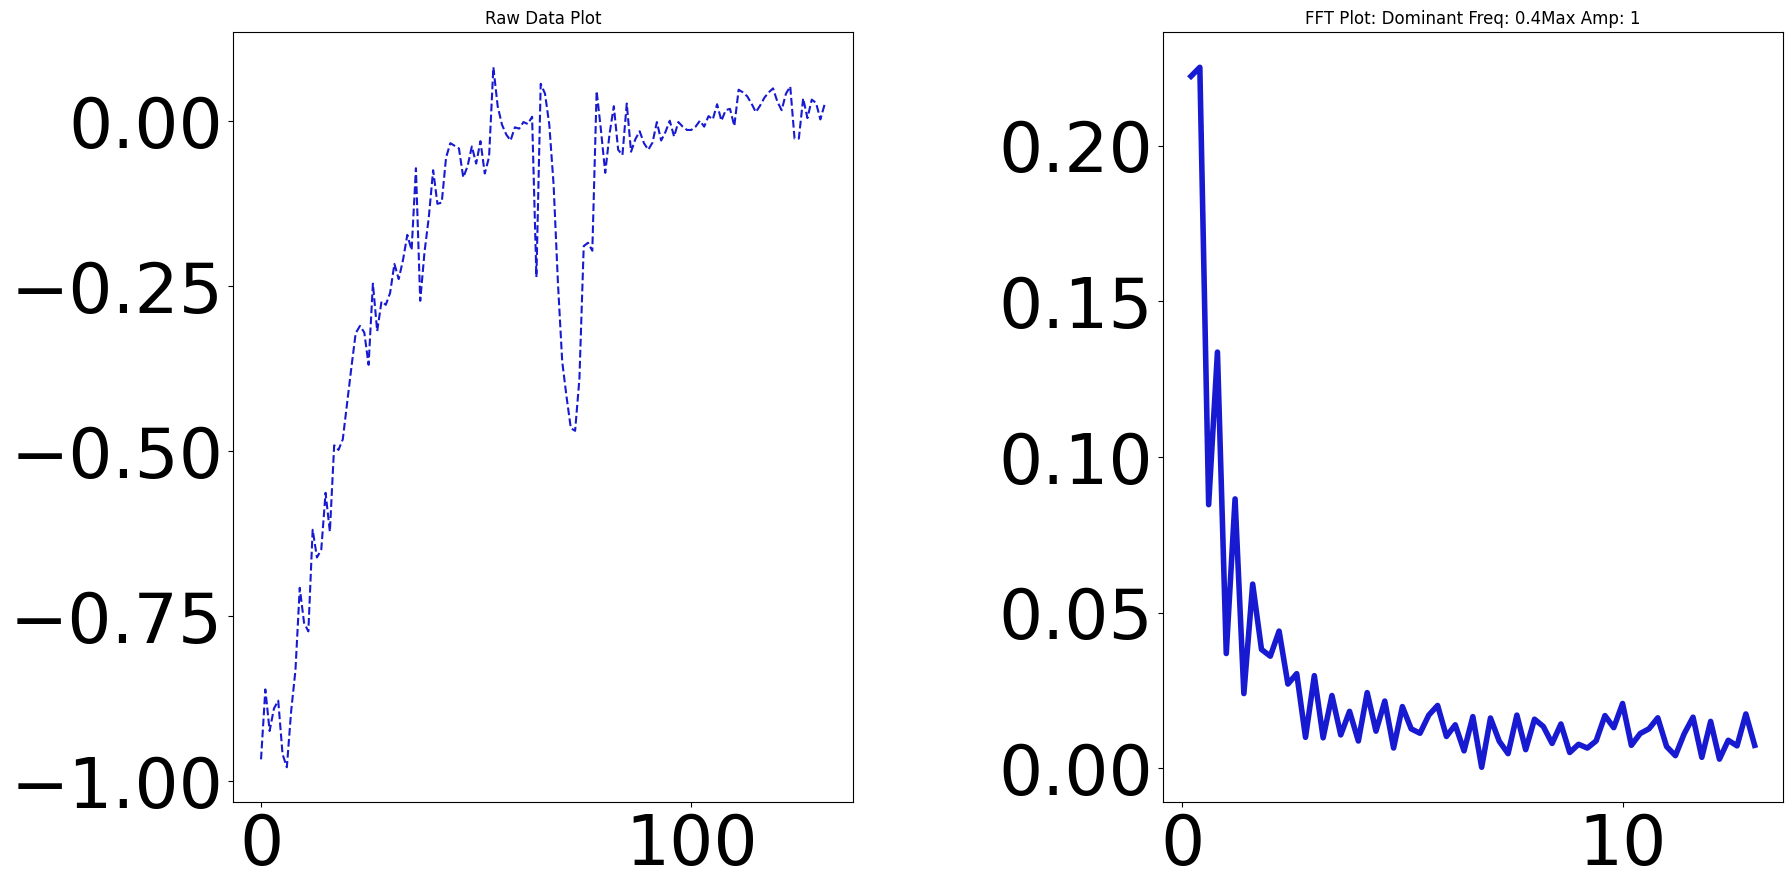

filename:  P9_Left_A1_Moving_the_chair_back_and_forth_6.csv
num_values:  8
total_sum:  214
Dominant Frequency:AMP.argmax() 0.12500000000000003
Maximum amplitude index: -  1


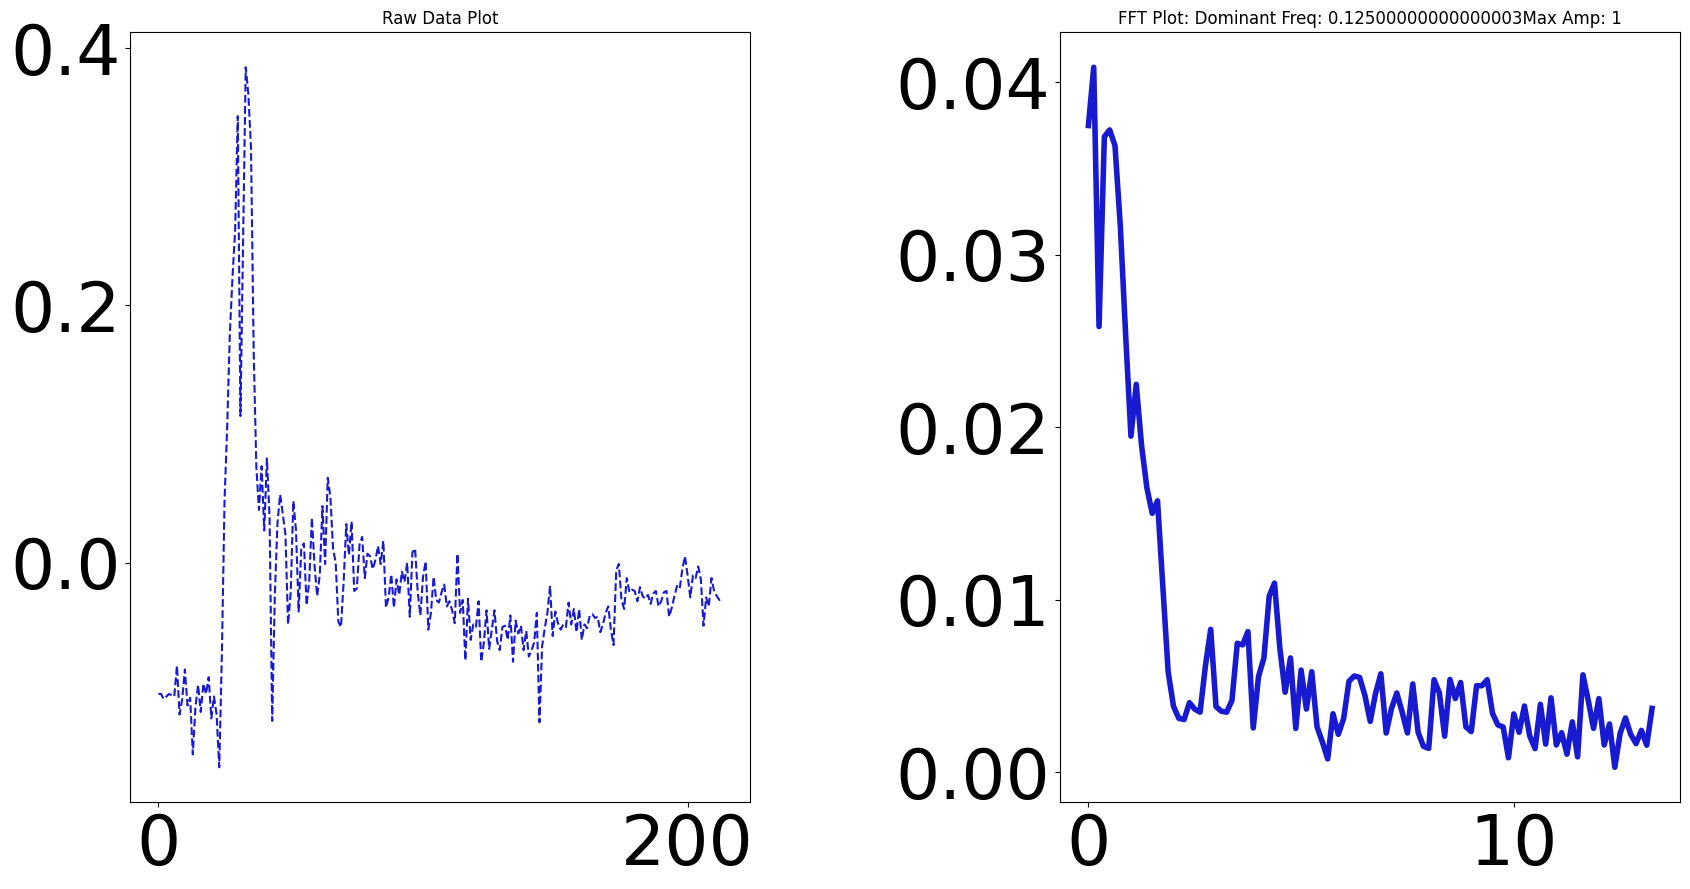

filename:  P22_Right_A3_Moving_the_chair_back_and_forth_2.csv
num_values:  9
total_sum:  239
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


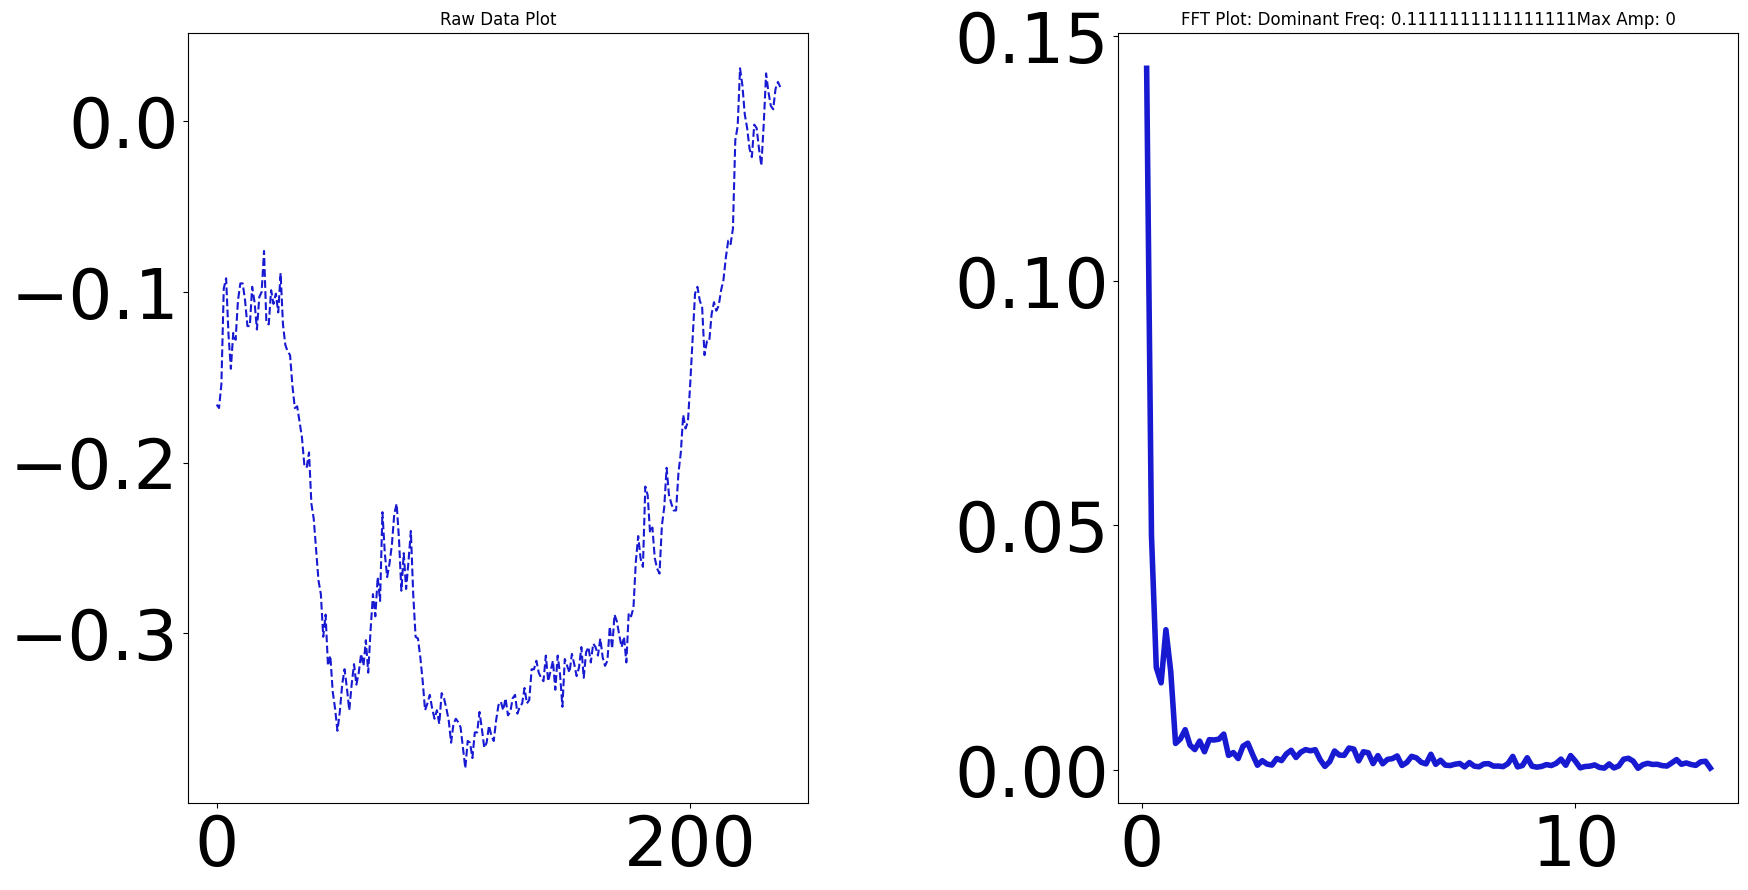

filename:  P24_Right_A2_NoHyp_11.csv
num_values:  1
total_sum:  26
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


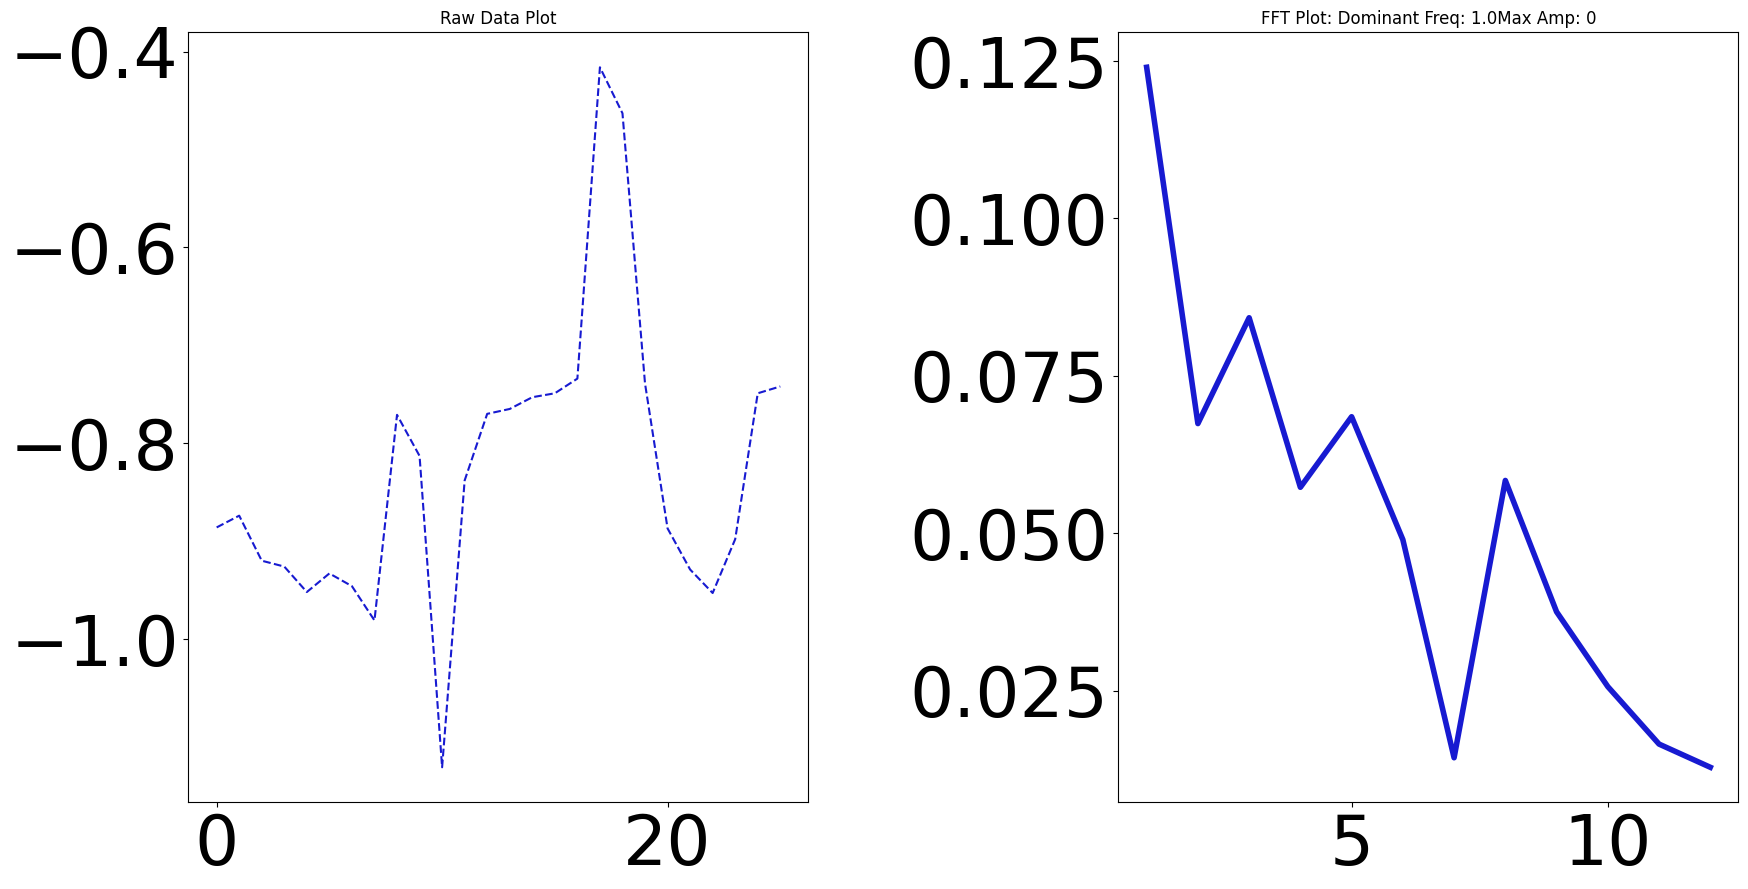

filename:  P5_Left_A3_NoHyp_19.csv
num_values:  48
total_sum:  1271
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


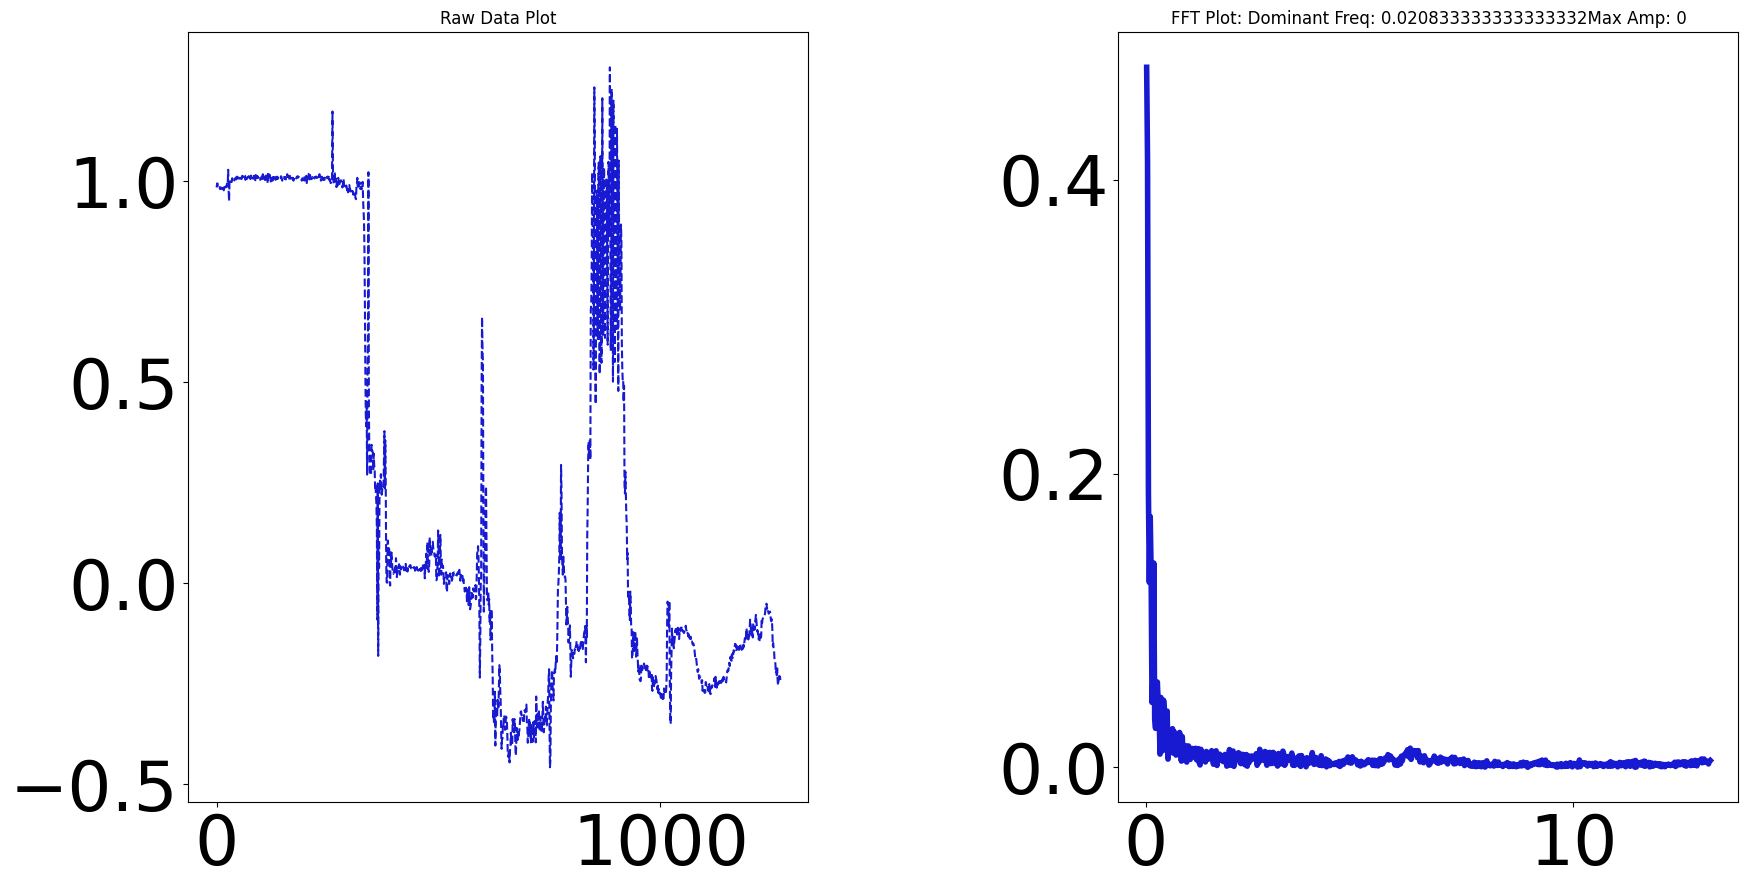

filename:  P9_Left_A4_NoHyp_6.csv
num_values:  1
total_sum:  27
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


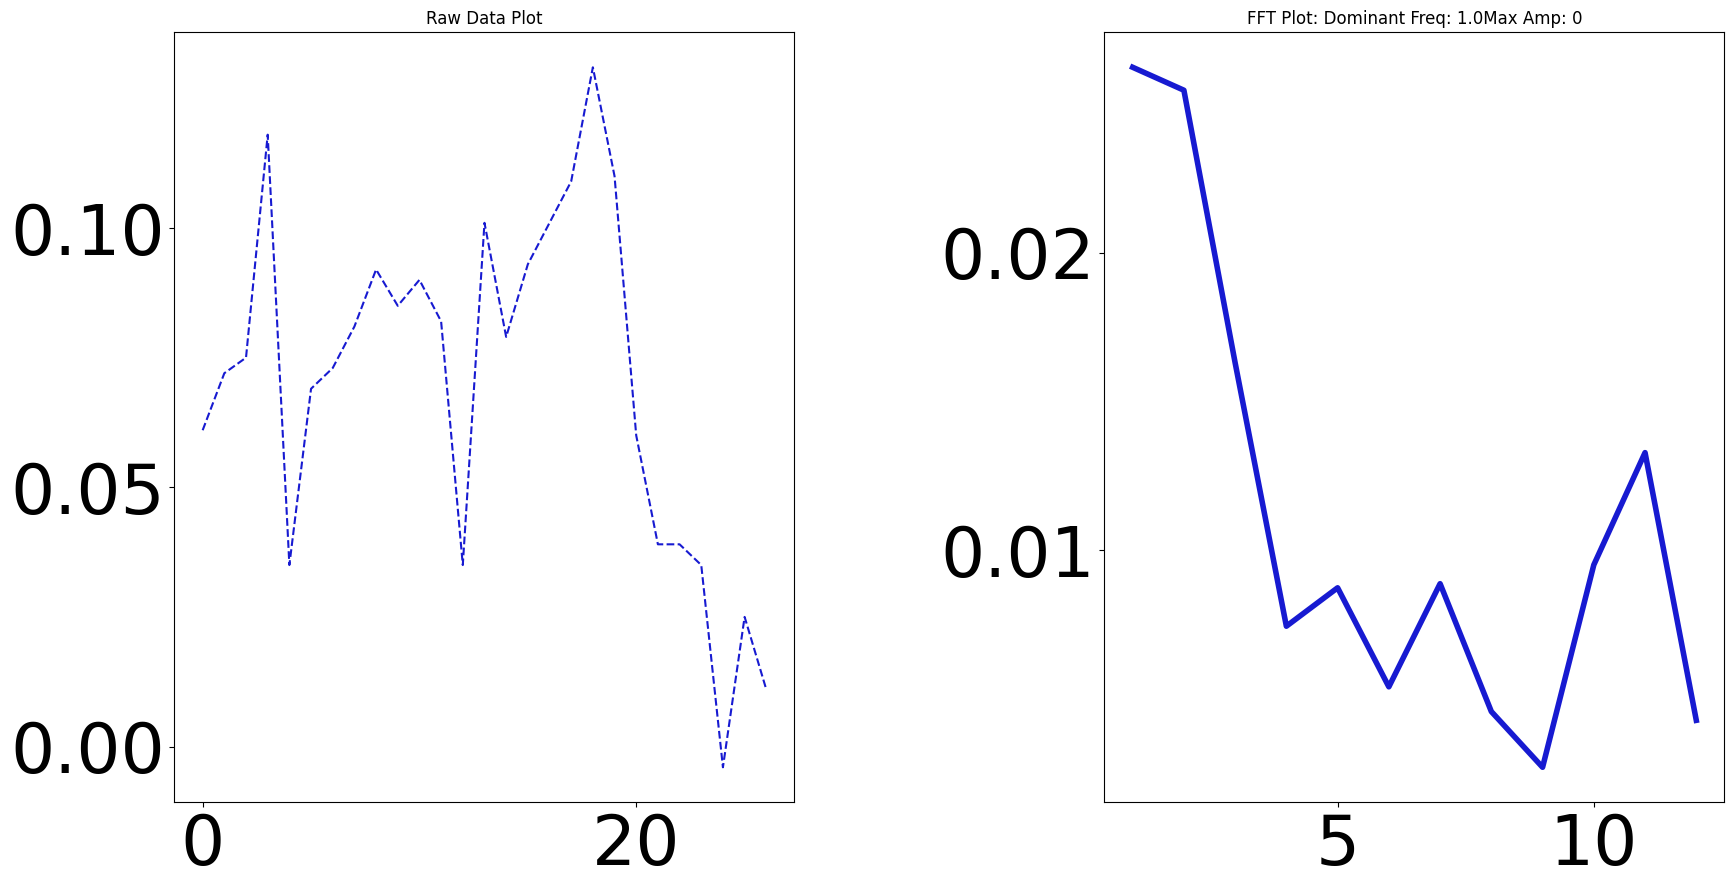

filename:  P12_Right_A3_NoHyp_3.csv
num_values:  42
total_sum:  1110
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


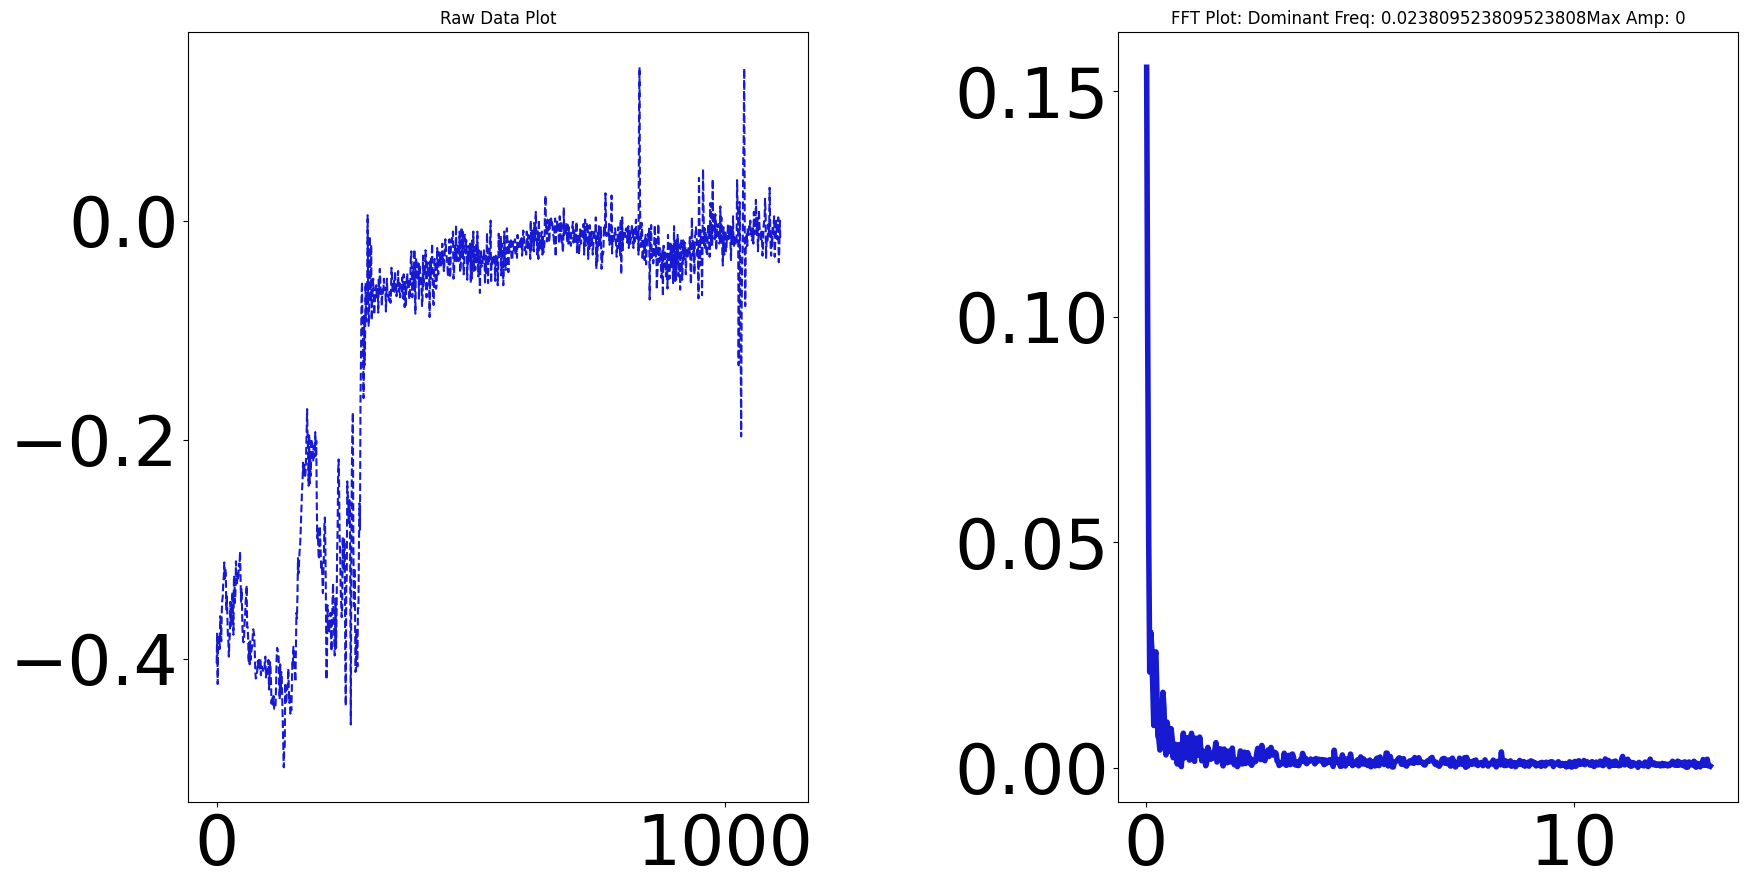

filename:  P5_Left_A3_NoHyp_31.csv
num_values:  16
total_sum:  425
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


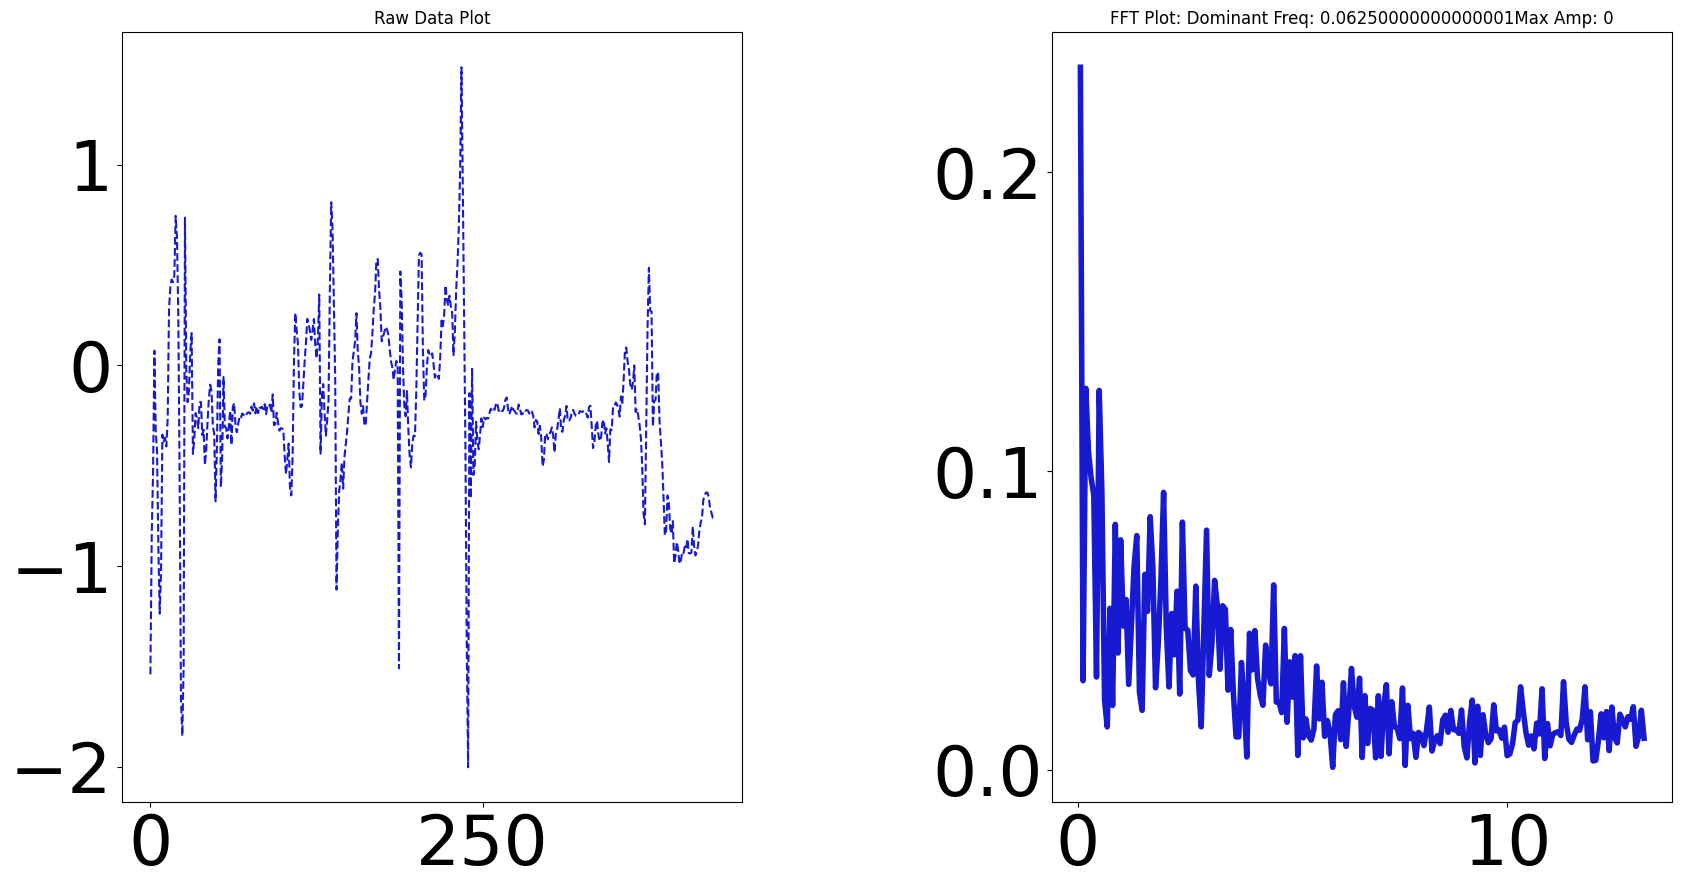

filename:  P9_Right_A1_Moving_the_chair_back_and_forth_6.csv
num_values:  8
total_sum:  209
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


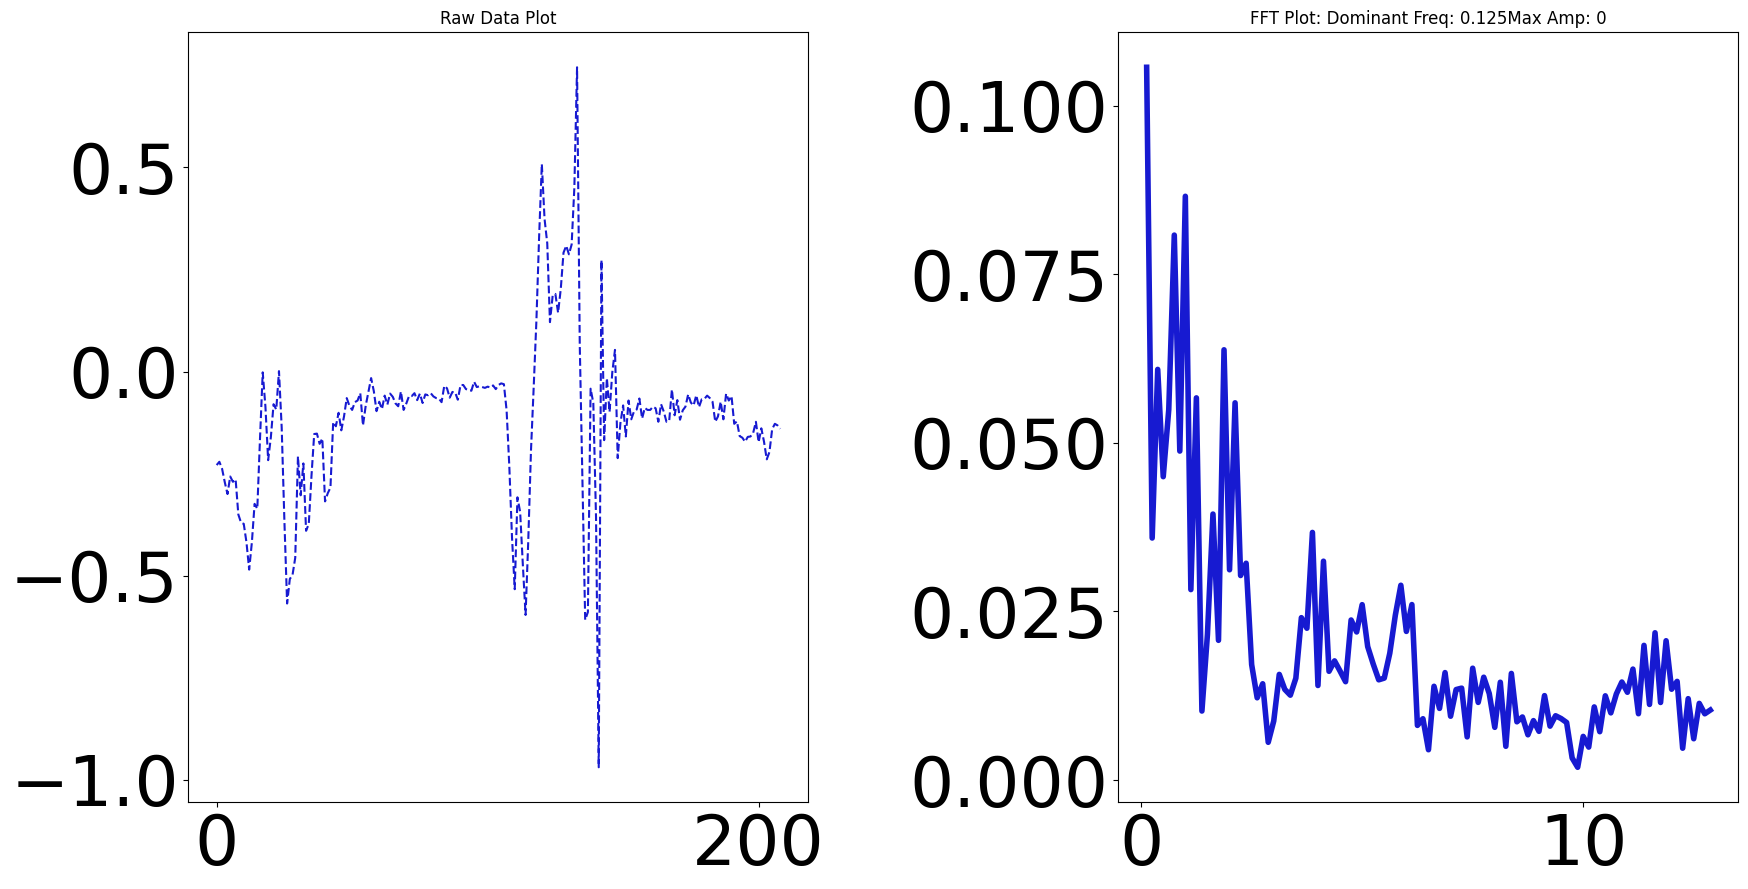

filename:  P8_Right_A4_NoHyp_2.csv
num_values:  249
total_sum:  6589
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


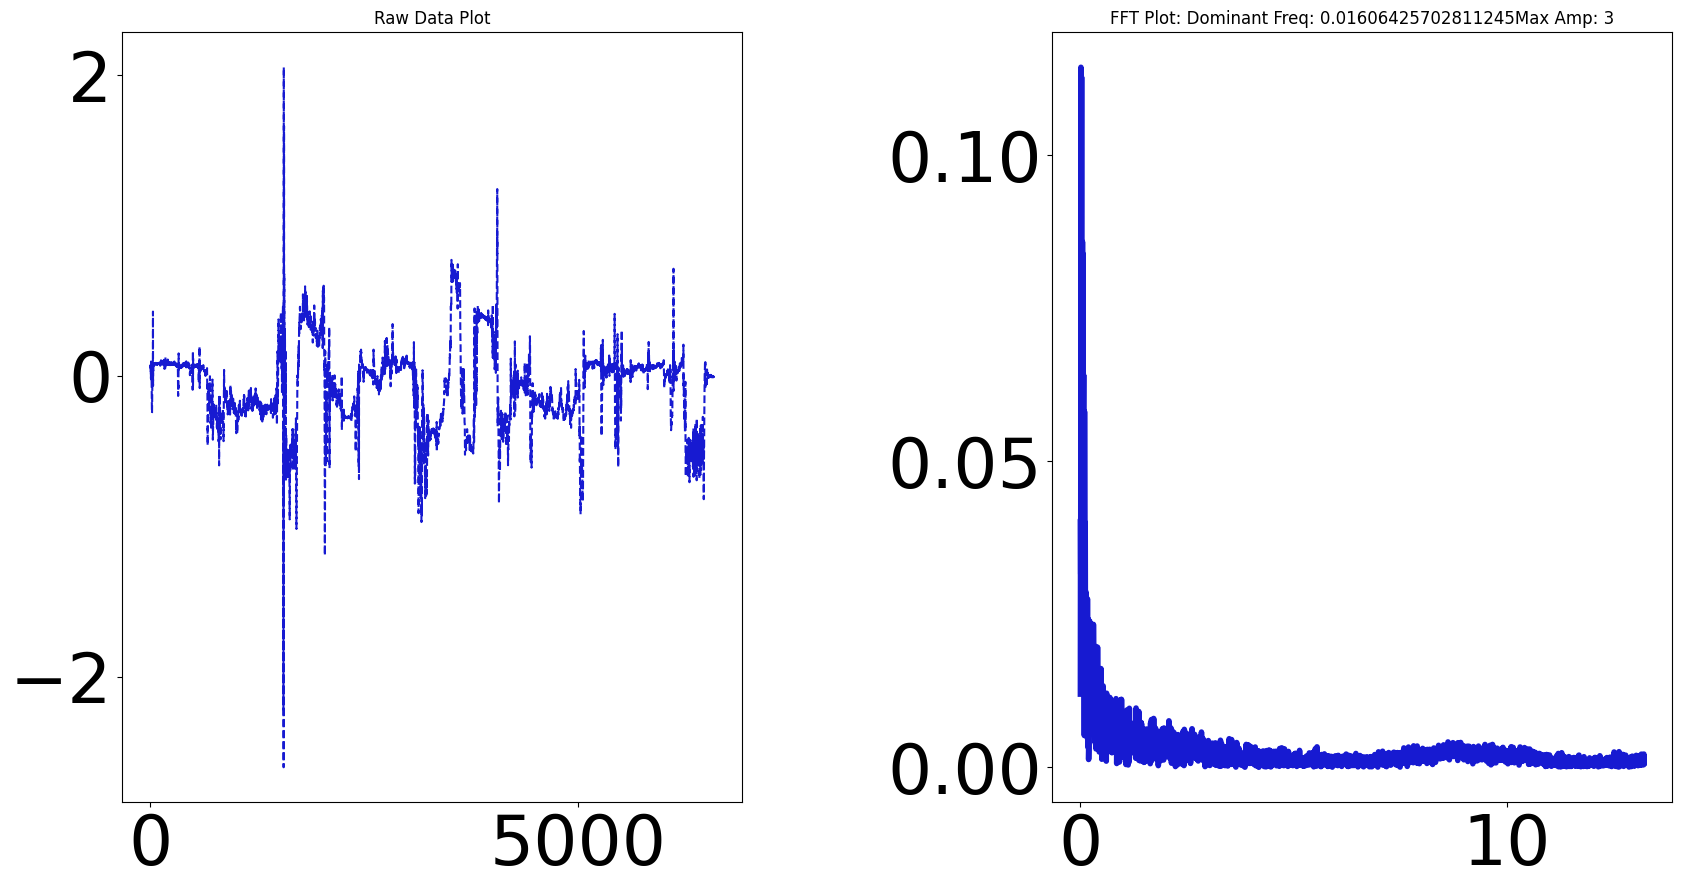

filename:  P10_Left_A4_NoHyp_16.csv
num_values:  4
total_sum:  214
 FLAG !!!!!!!!!! 
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


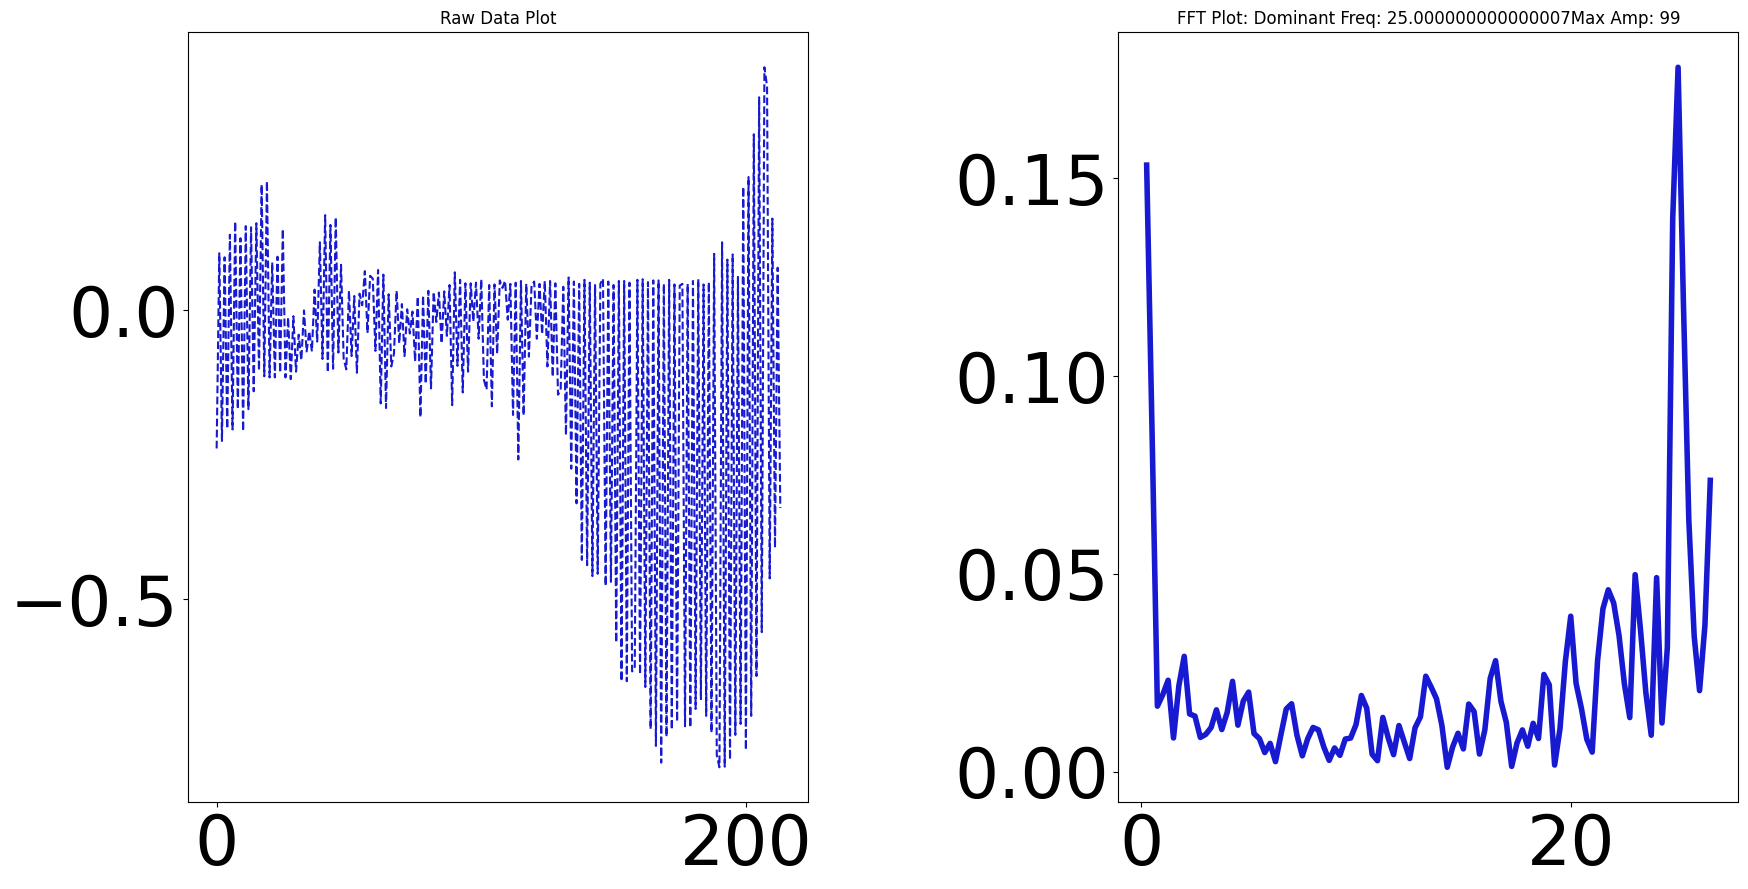

filename:  P5_Left_A3_NoHyp_25.csv
num_values:  84
total_sum:  2206
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


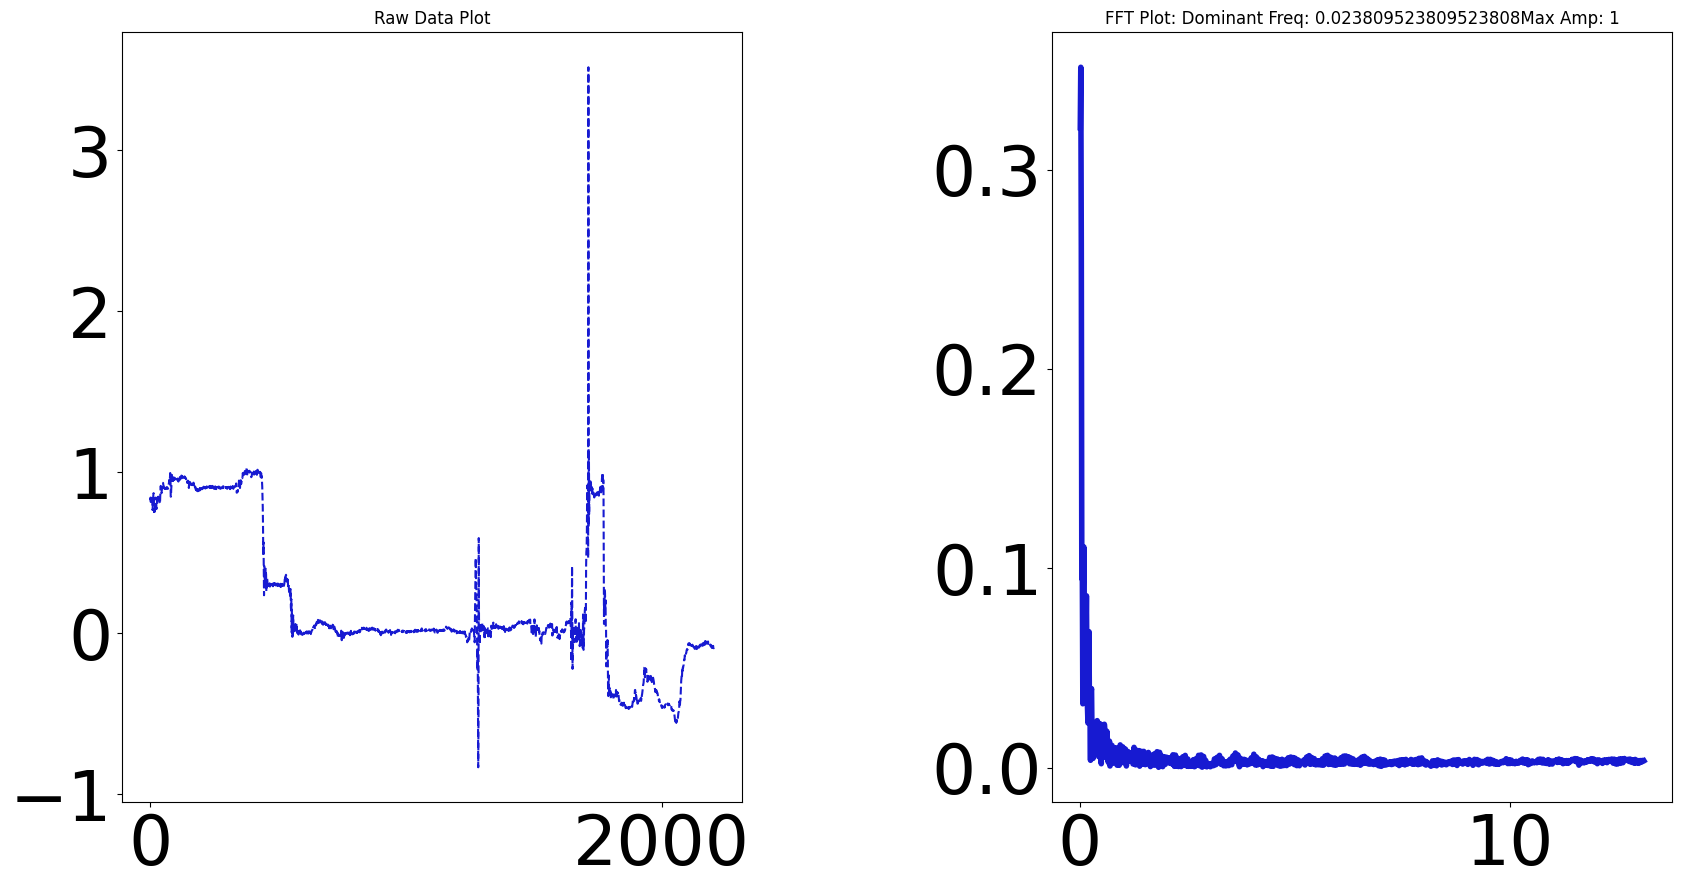

filename:  P24_Left_A3_Moving_the_chair_back_and_forth_2.csv
num_values:  29
total_sum:  774
Dominant Frequency:AMP.argmax() 0.034482758620689655
Maximum amplitude index: -  1


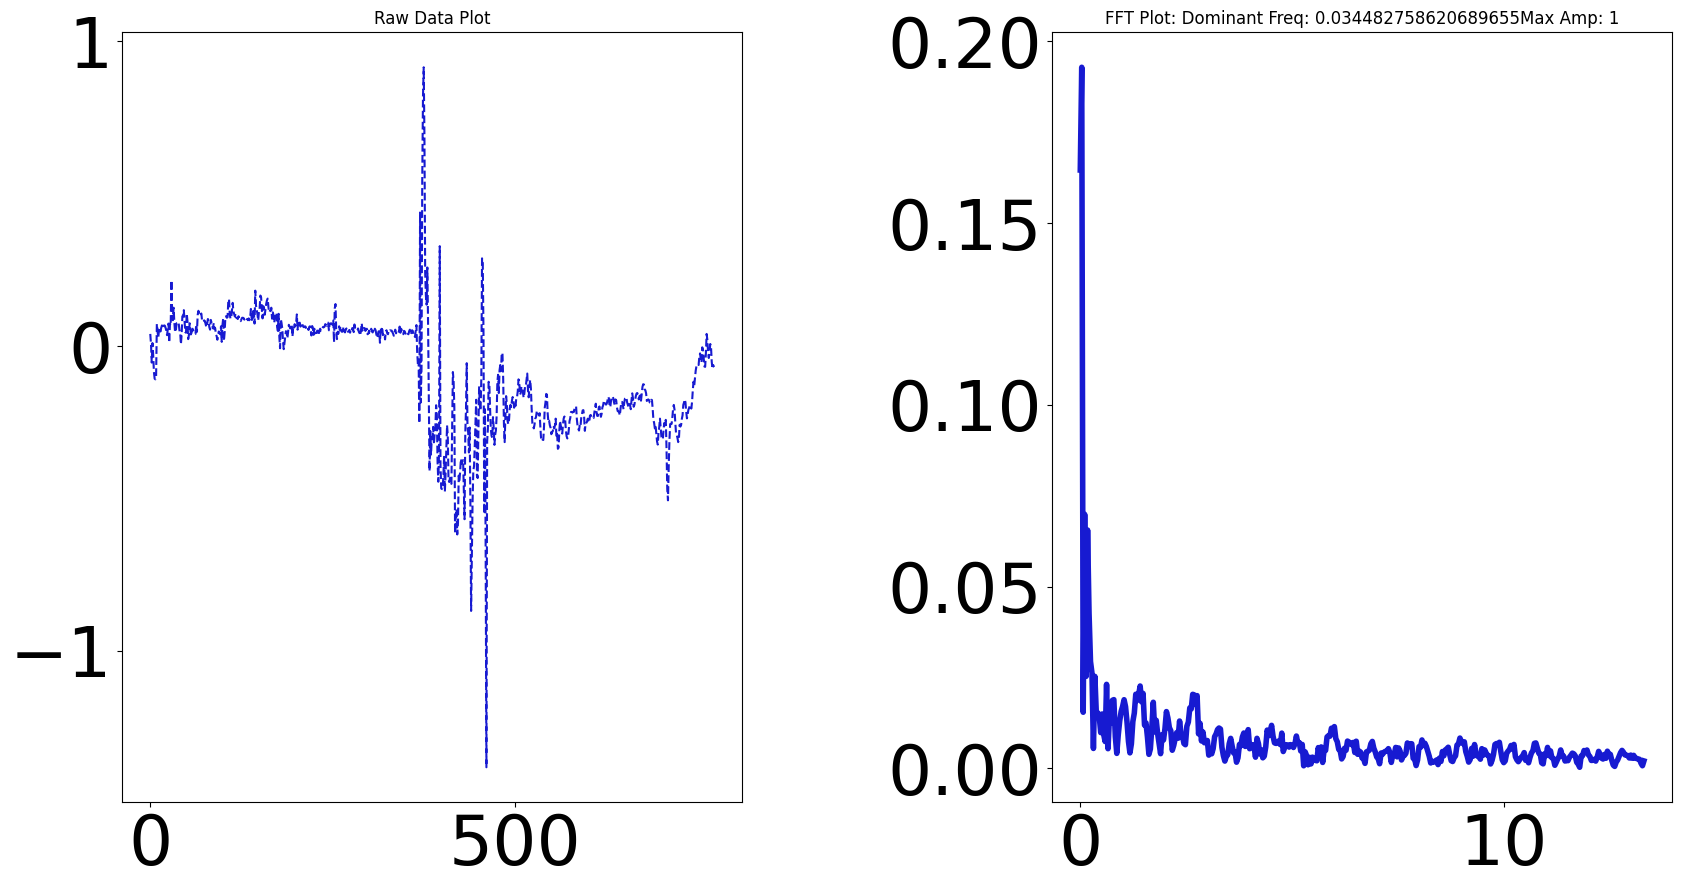

Skipping Talking_to_peers
Skipping Talking_to_self
filename:  P6_Right_A2_NoHyp_2.csv
num_values:  6
total_sum:  158
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


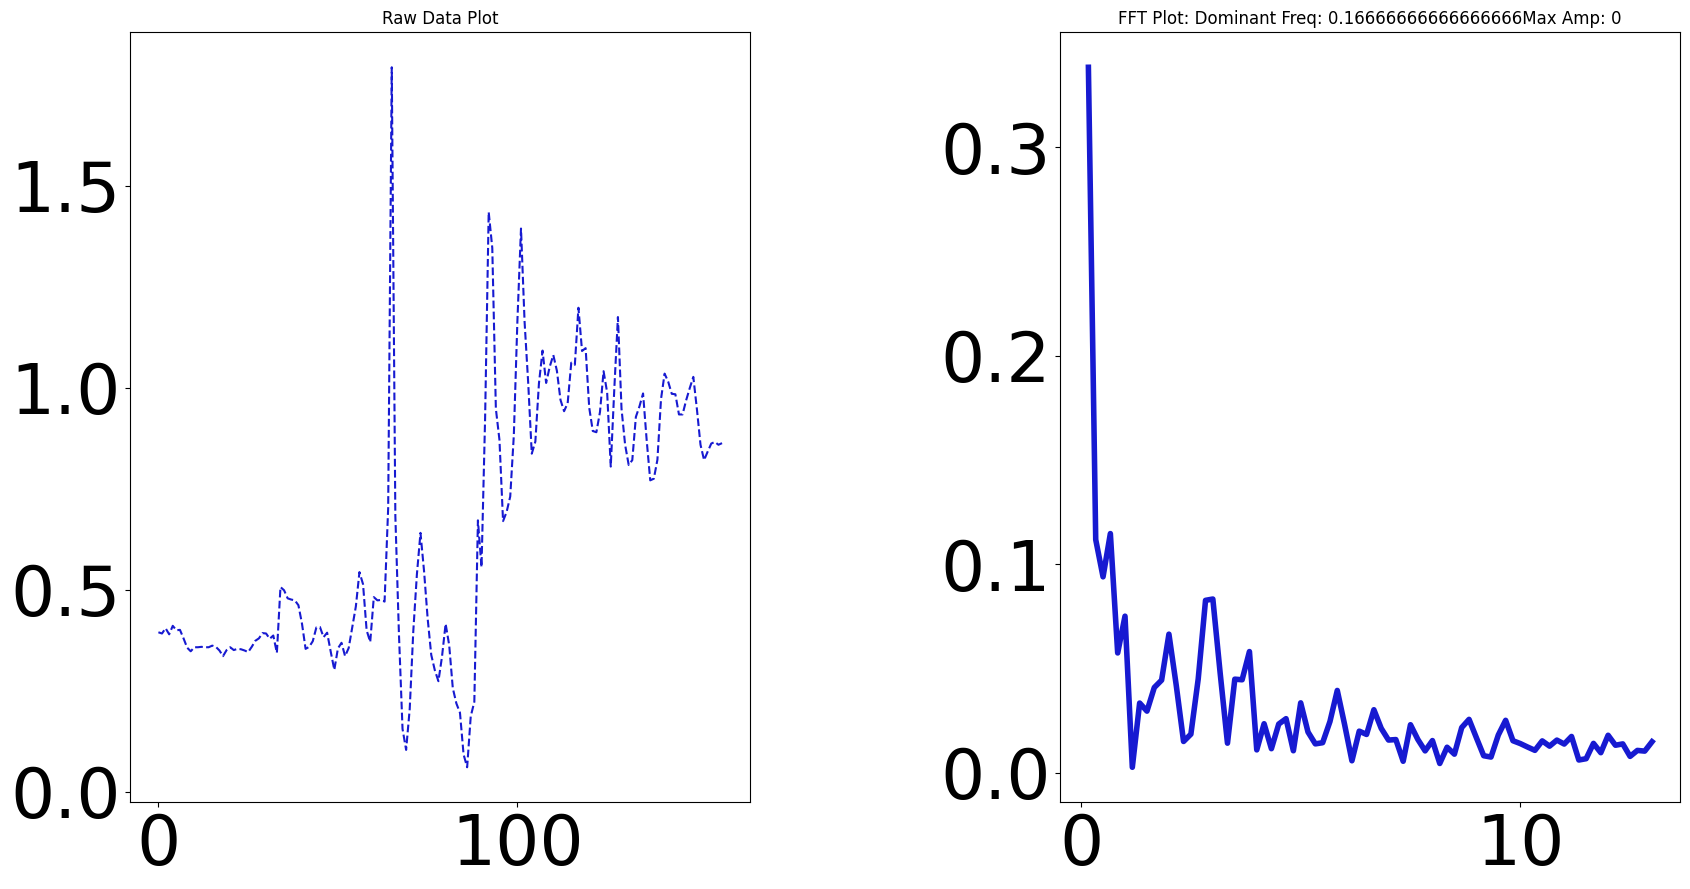

filename:  P8_Left_A3_Moving_the_chair_back_and_forth_1.csv
num_values:  6
total_sum:  164
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


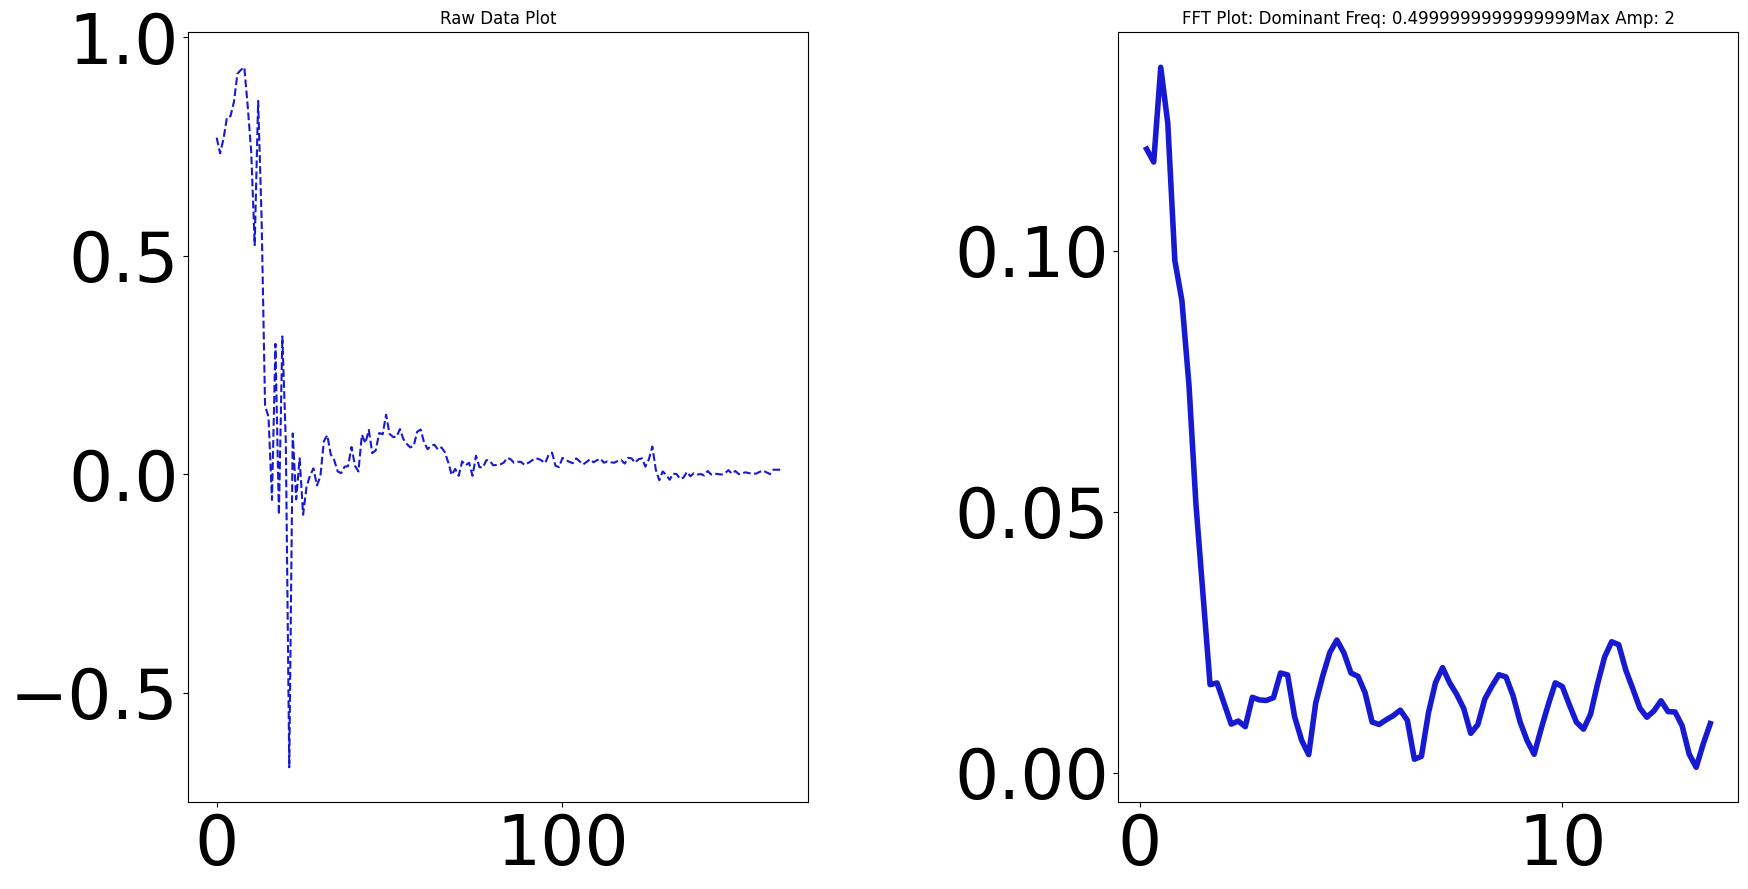

filename:  P15_Right_A2_NoHyp_1.csv
num_values:  44
total_sum:  1160
Dominant Frequency:AMP.argmax() 0.022727272727272728
Maximum amplitude index: -  1


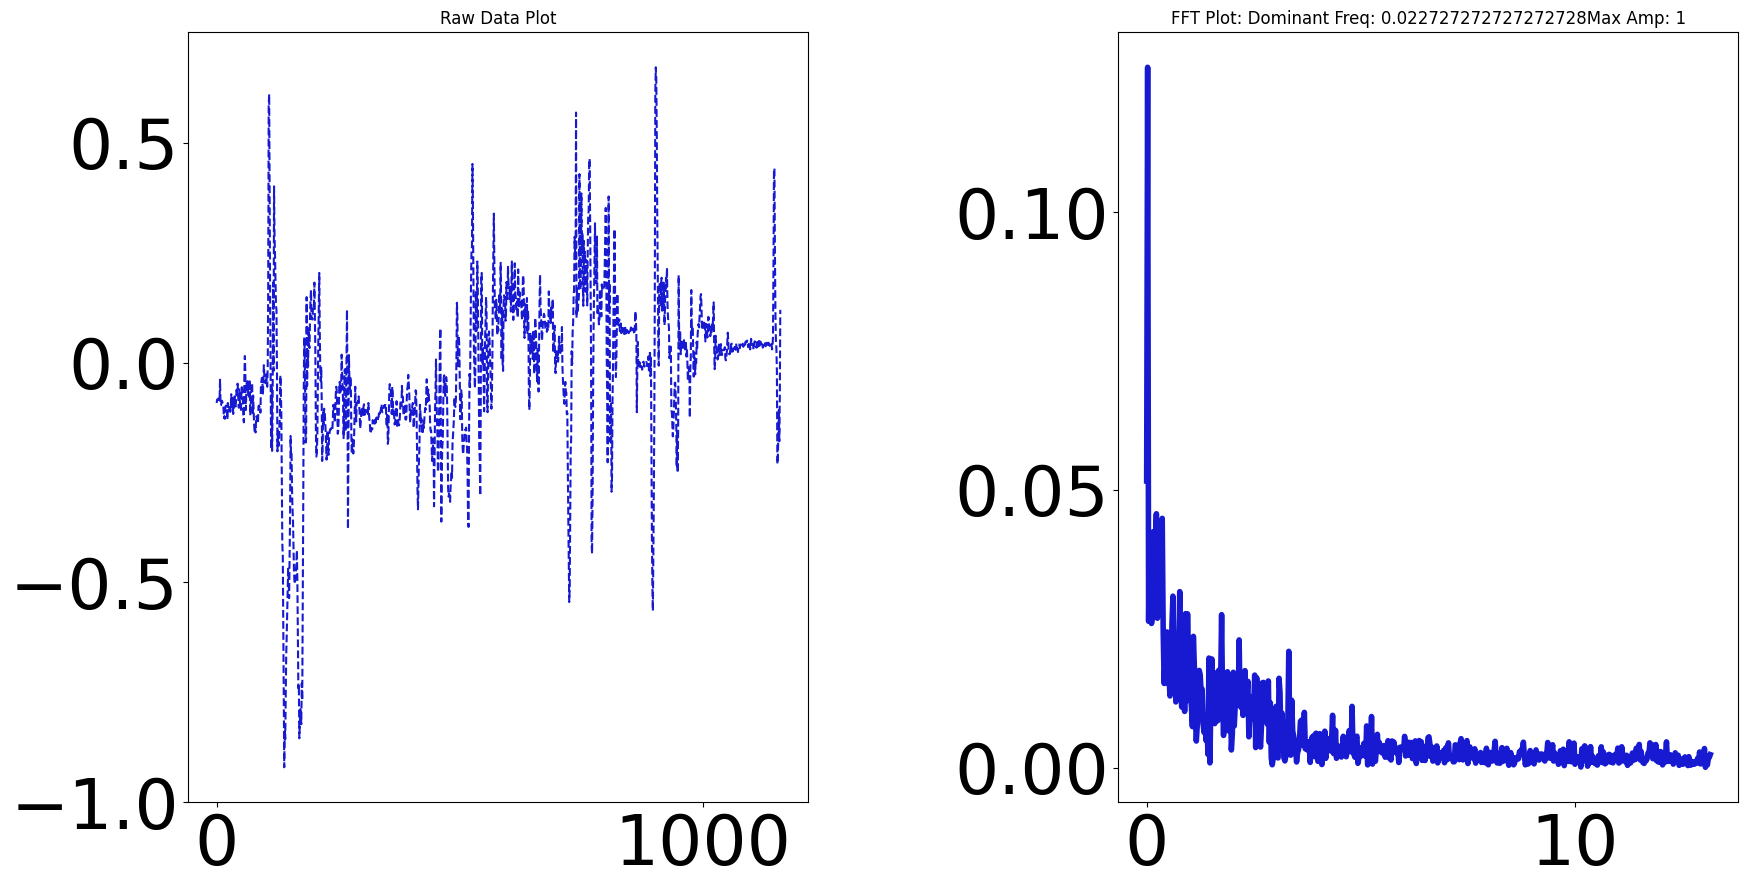

filename:  P7_Left_A3_NoHyp_48.csv
num_values:  10
total_sum:  267
Dominant Frequency:AMP.argmax() 0.1
Maximum amplitude index: -  1


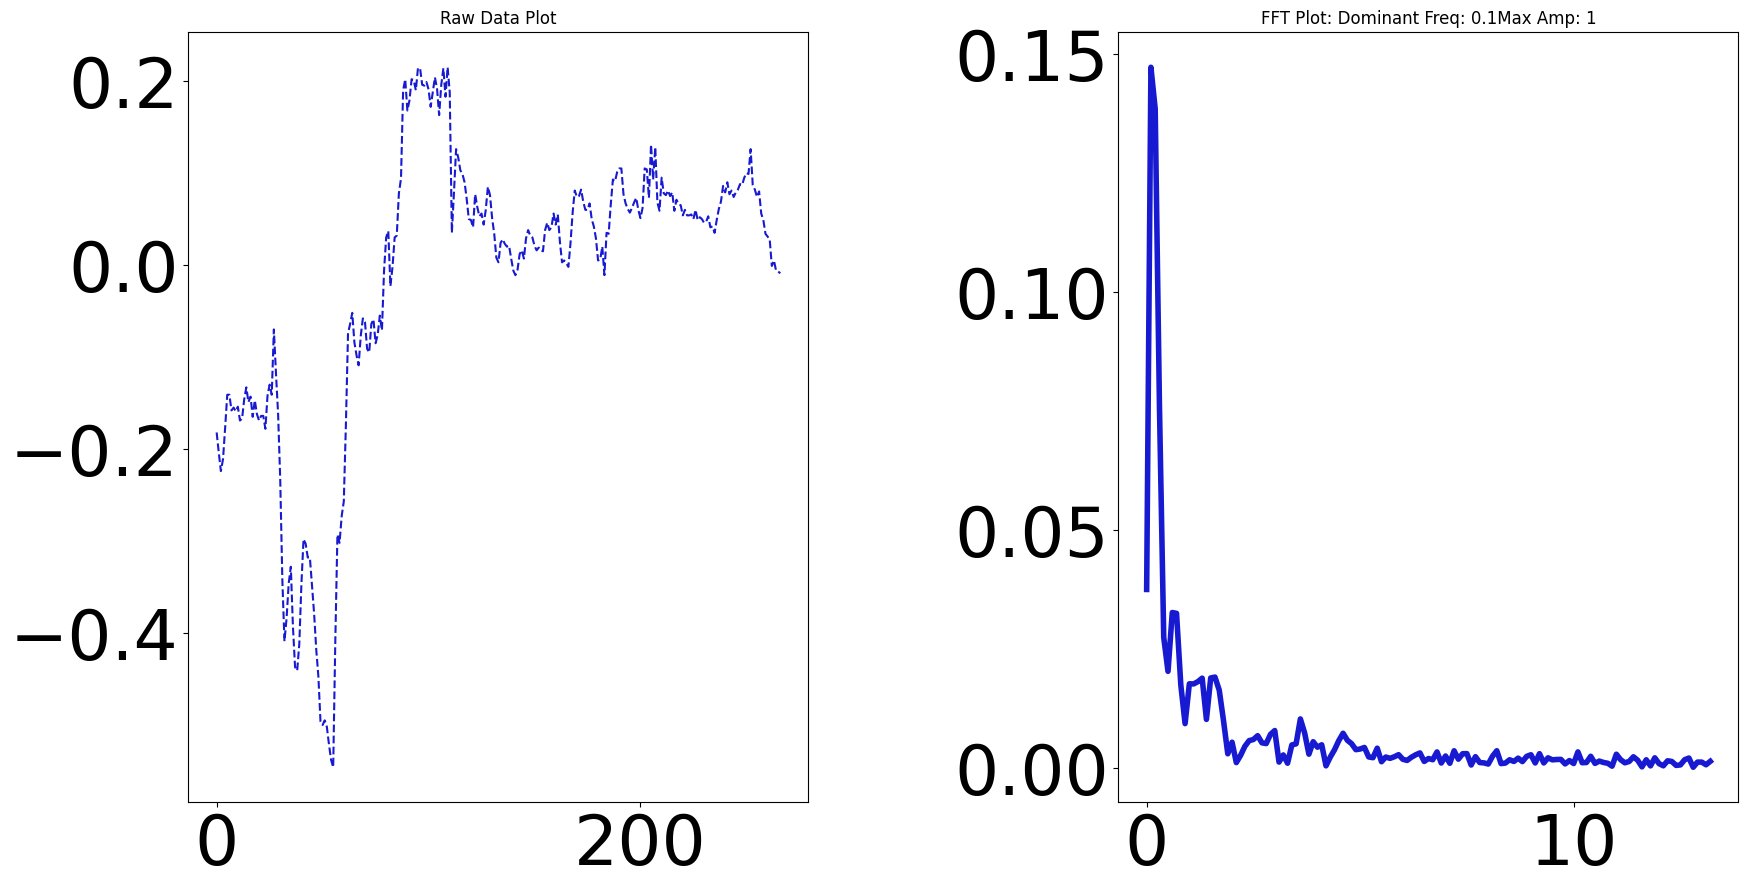

filename:  P13_Right_A4_Drumming_fingers__3.csv
num_values:  12
total_sum:  315
Dominant Frequency:AMP.argmax() 0.0
Maximum amplitude index: -  0


KeyboardInterrupt: 

In [24]:
read_all_blobs(folder_path_blobs)

In [ ]:
df = pd.read_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/BlobsOFSegments/P8_Left_A3__Tapping_foot___Bouncing_leg___Shaking_leg___Tapping_Foot_1.csv")


In [ ]:
filenamestr = "P8_Left_A3__Tapping_foot___Bouncing_leg___Shaking_leg___Tapping_Foot_1.csv"

In [25]:
def activity_duration(df):
    timestamp_str1 = df["NewClock"][0]
    timestamp_str2 = df["NewClock"][df["NewClock"].shape[0]-1]
    
    # Convert string timestamps to datetime objects
    time_format = "%H:%M:%S"
    time1 = datetime.strptime(timestamp_str1, time_format)
    time2 = datetime.strptime(timestamp_str2, time_format)
    
    # Calculate the time difference
    time_difference = time2 - time1
    
    # Convert the time difference to seconds
    time_difference_seconds = time_difference.total_seconds()
    return time_difference_seconds
    
    

In [29]:
# Reads each blobs of segments and calculates the time each blob ouccured. 
def read_all_blobs(folder_path):
    dfs = []
    file_list = os.listdir(folder_path)
    filename_list = []
    time_difference_seconds_list = []
    pid_list = []
    hand_list = []
    activity_list = []
    for filename in file_list:
        if filename.endswith('.csv'):
            substring1 = "Talking_to_peers"
            substring2 = "Talking_to_self"
            if substring1 in filename or substring2 in filename:
                print("Skipping Talking_to_peers")
                print("Skipping Talking_to_self")
                pass
            else:
                file_path = os.path.join(folder_path, filename)
                print("===========================================================================================================")
                print("filename: ",filename)
                df = pd.read_csv(file_path)
                time_difference_seconds = activity_duration(df)         
                pid = filename.split("_")[0]
                hand = filename.split("_")[1]
                activity = filename.split("_")[2]
                filename_list.append(filename)
                time_difference_seconds_list.append(time_difference_seconds)
                print("pid: ==== ",pid)
                pid_list.append(pid)
                hand_list.append(hand)
                activity_list.append(activity)
    df_duration = pd.DataFrame({'Filename': filename_list, 'Duration': time_difference_seconds_list, 'PID': pid_list,'hand_list': hand_list,'activity_id': activity_list,})
    return df_duration


In [27]:
df_duration = read_all_blobs(folder_path_blobs)

filename:  P11_Left_A3_Moving_the_chair_back_and_forth_6.csv
pid: ====  P11
Skipping Talking_to_peers
Skipping Talking_to_self
Skipping Talking_to_peers
Skipping Talking_to_self
Skipping Talking_to_peers
Skipping Talking_to_self
filename:  P19_Left_A3_NoHyp_4.csv
pid: ====  P19
filename:  P21_Left_A1_NoHyp_17.csv
pid: ====  P21
filename:  P7_Right_A3_NoHyp_89.csv
pid: ====  P7
filename:  P9_Left_A1_Moving_the_chair_back_and_forth_6.csv
pid: ====  P9
filename:  P22_Right_A3_Moving_the_chair_back_and_forth_2.csv
pid: ====  P22
filename:  P24_Right_A2_NoHyp_11.csv
pid: ====  P24
filename:  P5_Left_A3_NoHyp_19.csv
pid: ====  P5
filename:  P9_Left_A4_NoHyp_6.csv
pid: ====  P9
filename:  P12_Right_A3_NoHyp_3.csv
pid: ====  P12
filename:  P5_Left_A3_NoHyp_31.csv
pid: ====  P5
filename:  P9_Right_A1_Moving_the_chair_back_and_forth_6.csv
pid: ====  P9
filename:  P8_Right_A4_NoHyp_2.csv
pid: ====  P8
filename:  P10_Left_A4_NoHyp_16.csv
pid: ====  P10
filename:  P5_Left_A3_NoHyp_25.csv
pid: ==== 

In [28]:
df_duration

Filename  Duration  PID  \
0     P11_Left_A3_Moving_the_chair_back_and_forth_6.csv       1.0  P11   
1                               P19_Left_A3_NoHyp_4.csv      27.0  P19   
2                              P21_Left_A1_NoHyp_17.csv      40.0  P21   
3                              P7_Right_A3_NoHyp_89.csv       4.0   P7   
4      P9_Left_A1_Moving_the_chair_back_and_forth_6.csv       7.0   P9   
...                                                 ...       ...  ...   
4019                           P7_Right_A3_NoHyp_84.csv       1.0   P7   
4020                           P10_Left_A4_NoHyp_27.csv       3.0  P10   
4021                            P16_Left_A2_NoHyp_3.csv      38.0  P16   
4022                            P7_Left_A3_NoHyp_86.csv       2.0   P7   
4023                            P5_Left_A3_NoHyp_14.csv      22.0   P5   

     hand_list activity_id  
0         Left          A3  
1         Left          A3  
2         Left          A1  
3        Right          A3  
4         Left          A1  
...        ...         ...  
4019     Right          A3  
4020      Left          A4  
4021      Left          A2  
4022      Left          A3  
4023      Left          A3  

[4024 rows x 5 columns]

In [32]:
# Clean up the the hyperactive behaviour names.
def pre_datacleaning(features_df):
    ################################################
    # Filter out specfic behaviour types.
    ################################################
    # Define the strings you want to filter , Moving the chair back and forth 2.csv
    # strings_to_remove = ['peers', 'self']#'foot','leg','object','fingers','hair','Standing','tapping']
    df_standing = features_df[features_df['Filename'].str.contains("Standing")]
    df_standing["newFeatureName"] = "SW"
    #df_standing["BehaviourTypeCleaned"] = 1
    df_mov_chair = features_df[features_df['Filename'].str.contains("chair")]
    df_mov_chair["newFeatureName"] = "MC"
    #df_mov_chair["BehaviourTypeCleaned"] = 2
    df_object = features_df[features_df['Filename'].str.contains("Manipulating")] 
    df_object["newFeatureName"] = "MO"
    #df_object["BehaviourTypeCleaned"] = 3
    df_twriling_hair = features_df[features_df['Filename'].str.contains("Twirling")] 
    df_twriling_hair["newFeatureName"] = "TH"
    #df_twriling_hair["BehaviourTypeCleaned"] = 4
    
    df_drumming = features_df[features_df['Filename'].str.contains("Drumming")]
    df_drumming["newFeatureName"] = "DF"
    #df_drumming["BehaviourTypeCleaned"] = 5
    
    df_finger_tap = features_df[features_df['Filename'].str.contains("Finger")] 
    df_finger_tap["newFeatureName"] = "FT"
    #df_finger_tap["BehaviourTypeCleaned"] = 6
    
    df_no_hyp  =  features_df[features_df['Filename'].str.contains("NoHyp")]
    df_no_hyp["newFeatureName"] = "NH"
    #df_no_hyp["BehaviourTypeCleaned"] = 7
    
    df_combined = pd.concat([df_no_hyp,df_mov_chair,df_twriling_hair,df_object,df_drumming,df_finger_tap,df_standing])
    return df_combined


In [33]:
duration_of_each_activity = pre_datacleaning(df_duration)

/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1372/557129365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standing["newFeatureName"] = "SW"
/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1372/557129365.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov_chair["newFeatureName"] = "MC"
/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1372/557129365.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [39]:
# duration_of_each_activity.to_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments/duration.csv",index=0)


In [40]:

print("Number of participants in duration of hyperactive behaviour types: ", len(duration_of_each_activity["PID"].unique()))


Number of participants in duration of hyperactive behaviour types:  19


In [41]:
#duration_of_each_activity.to_csv("~/Desktop/duration.csv",index=0)

In [42]:
# /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments
duration_df = pd.read_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments/duration.csv")


In [43]:
duration_df_a1 = duration_df[duration_df["activity_id"] =="A1"]
duration_df_a2 = duration_df[duration_df["activity_id"] =="A2"]
duration_df_a3 = duration_df[duration_df["activity_id"] =="A3"]
duration_df_a4 = duration_df[duration_df["activity_id"] =="A4"]


In [66]:
len(duration_df_a1["PID"].unique())

18

In [45]:

#duration_df_a1.to_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments/durationA1.csv",index=0)
#duration_df_a2.to_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments/durationA2.csv",index=0)
#duration_df_a3.to_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments/durationA3.csv",index=0)
#duration_df_a4.to_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/CodeOutputs/FeatureAnalysisPlots_of_BlobsOfSegments/durationA4.csv",index=0)



In [49]:
# filter durations by hyperactive behaviour type.
df_standing = duration_df[duration_df["newFeatureName"]== "SW"]
df_mov_chair = duration_df[duration_df["newFeatureName"] == "MC"]
df_object = duration_df[duration_df["newFeatureName"] == "MO"]
df_twriling_hair = duration_df[duration_df["newFeatureName"] == "TH"]
df_drumming = duration_df[duration_df["newFeatureName"] == "DF"]
df_finger_tap = duration_df[duration_df["newFeatureName"] == "FT"]
df_no_hyp = duration_df[duration_df["newFeatureName"] == "NH"]



In [80]:
df_standing

Filename  Duration  PID hand_list  \
3824   P16_Left_A2_Standing_up_while_working__2.csv       0.0  P16      Left   
3825   P8_Right_A1_Standing_up_while_working__2.csv       1.0   P8     Right   
3826   P22_Left_A3_Standing_up_while_working__7.csv      78.0  P22      Left   
3827  P23_Right_A1_Standing_up_while_working__2.csv       7.0  P23     Right   
3828  P23_Right_A1_Standing_up_while_working__3.csv       2.0  P23     Right   
...                                             ...       ...  ...       ...   
4010  P24_Right_A3_Standing_up_while_working__2.csv      30.0  P24     Right   
4011  P18_Right_A2_Standing_up_while_working__1.csv     174.0  P18     Right   
4012    P6_Left_A4_Standing_up_while_working__2.csv       8.0   P6      Left   
4013   P23_Left_A4_Standing_up_while_working__2.csv      80.0  P23      Left   
4014   P24_Left_A3_Standing_up_while_working__2.csv      30.0  P24      Left   

     activity_id newFeatureName  
3824          A2             SW  
3825          A1             SW  
3826          A3             SW  
3827          A1             SW  
3828          A1             SW  
...          ...            ...  
4010          A3             SW  
4011          A2             SW  
4012          A4             SW  
4013          A4             SW  
4014          A3             SW  

[191 rows x 6 columns]

In [50]:
descriptive_stats = df_standing[df_standing["hand_list"]=="Right"].describe(include='all', percentiles=[0.1, 0.9])
descriptive_stats

Filename    Duration  PID  \
count                                              75   75.000000   75   
unique                                             75         NaN   12   
top     P18_Right_A2_Standing_up_while_working__1.csv         NaN  P23   
freq                                                1         NaN   16   
mean                                              NaN   70.106667  NaN   
std                                               NaN  111.067495  NaN   
min                                               NaN    0.000000  NaN   
10%                                               NaN    2.000000  NaN   
50%                                               NaN   22.000000  NaN   
90%                                               NaN  200.400000  NaN   
max                                               NaN  505.000000  NaN   

       hand_list activity_id newFeatureName  
count         75          75             75  
unique         1           4              1  
top        Right          A2             SW  
freq          75          23             75  
mean         NaN         NaN            NaN  
std          NaN         NaN            NaN  
min          NaN         NaN            NaN  
10%          NaN         NaN            NaN  
50%          NaN         NaN            NaN  
90%          NaN         NaN            NaN  
max          NaN         NaN            NaN

In [51]:
import plotly.express as px


In [55]:
duration_df["newFeatureName"].unique()

array(['NH', 'MC', 'TH', 'MO', 'DF', 'FT', 'SW'], dtype=object)

In [56]:
# Define a custom color map for activity_id using hex values
color_map = {
    "MC": "#F3A3A6",  # Red
    "TH": "#A1A1A1",  # Green
    "MO": "#478F96",  # Blue
    "DF":"#BAEAEF",
    "FT":"#FFCC48",
    "SW": "#D48A9B"
    
}


In [77]:
print("Number of participants in the duration_df_a1: ",len(duration_df_a1["PID"].unique()))

Number of participants in the duration_df_a1:  18


In [78]:
right = duration_df_a1[duration_df_a1["hand_list"] == "Right"]
# right = right[right["Duration"] < 100]
print("Number of participants for the right hand: ",len(right["PID"].unique()))

Number of participants for the right hand:  15


In [79]:
missing_ids = list(set(duration_df_a1["PID"].unique()) - set(right["PID"].unique()))

print("Missing IDs:", missing_ids)

Missing IDs: ['P7', 'P16', 'P19']


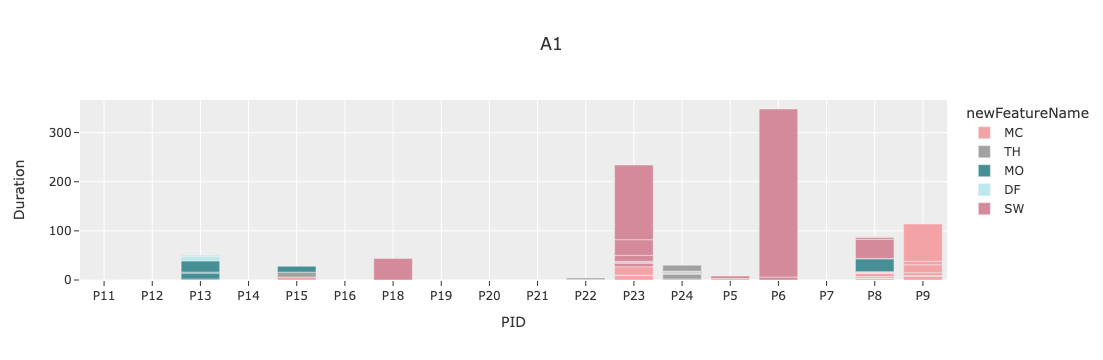

In [59]:
fig = px.bar(right,x="PID", y="Duration", color_discrete_map=color_map,color="newFeatureName",
             title="A1",template="ggplot2", category_orders={"PID": sorted(no_hyp["PID"].unique())},
            )
# fig.update_yaxes(tickvals=list(range(0, int(right["Duration"].max()) + 1, 10)))

fig.show()


In [ ]:
a2 = no_hyp[no_hyp["activity_id"]=="A2"]
right2 = a2[a2["hand_list"] == "Right"]
# right2 = right2[right2["Duration"] < 100]

fig = px.bar(right2,x="PID", y="Duration", color_discrete_map=color_map,color="newFeatureName",
             title="A2",template="ggplot2", category_orders={"PID": sorted(no_hyp["PID"].unique())})
# fig.update_yaxes(tickvals=list(range(0, int(right2["Duration"].max()) + 1, 10)))
fig.show()


In [ ]:
a3 = no_hyp[no_hyp["activity_id"]=="A3"]
right3 = a3[a3["hand_list"] == "Right"]
# right3 = right3[right3["Duration"] < 100]

fig = px.bar(right3,x="PID", y="Duration",color_discrete_map=color_map, color="newFeatureName",
             title="A3",template="ggplot2",category_orders={"PID": sorted(no_hyp["PID"].unique())})
# fig.update_yaxes(tickvals=list(range(0, int(right3["Duration"].max()) + 1, 80)))


fig.show()


In [ ]:
a4 = no_hyp[no_hyp["activity_id"]=="A4"]
right4 = a4[a4["hand_list"] == "Right"]
# right4 = right4[right4["Duration"] < 100]

fig = px.bar(right4,x="PID", y="Duration", color_discrete_map=color_map,color="newFeatureName",
             title="A4",template="ggplot2",category_orders={"PID": sorted(no_hyp["PID"].unique())})

fig.show()
